<a href="https://colab.research.google.com/github/vaca7/cp1/blob/main/Stockx_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [210]:
# 한글,마이너스 폰트 깨짐 해결
%config InlineBackend.figure_format='retina'
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)
warnings.filterwarnings("ignore")
%matplotlib inline

In [211]:
train = pd.read_csv("StockX-Data-Contest-2019-3.csv")
test = pd.read_csv("sneakers.csv")

print(train.shape)
print(test.shape)

(99956, 8)
(1000, 17)


In [212]:
df = train.copy()
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


In [214]:
df.describe()

,Shoe Size
count,99956.000000
mean,9.344181
std,2.329588
min,3.500000
25%,8.000000
50%,9.500000
75%,11.000000
max,17.000000


# Data Cleaning

## 텍스트 전처리

In [215]:
# 신발 이름에서 - 제거

df['Sneaker Name'] = df['Sneaker Name'].apply(lambda x: x.replace('-',' '))
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,$828,$220,2/11/17,11.0,Rhode Island


In [216]:
# Price 에서 [$ ,] 제거

df['Sale Price'] = df['Sale Price'].apply(lambda x : x.replace('$',''))
df['Sale Price'] = df['Sale Price'].apply(lambda x : x.replace(',',''))

df['Retail Price'] = df['Retail Price'].apply(lambda x : x.replace('$',''))
df['Retail Price'] = df['Retail Price'].apply(lambda x : x.replace(',',''))

df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2/11/17,11.0,Rhode Island


## 데이터 타입 변경

In [217]:
df.dtypes

Order Date       object
Brand            object
Sneaker Name     object
Sale Price       object
Retail Price     object
Release Date     object
Shoe Size       float64
Buyer Region     object
dtype: object

In [218]:
# 주문 일자, Release Date

df['Order Date'] = pd.to_datetime(df['Order Date'],format='%m/%d/%y')
df['Release Date'] = pd.to_datetime(df['Release Date'],format='%m/%d/%y')
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island


In [219]:
# 판매가, 소매가 object -> numerical 데이터 타입 변경

target_col = ['Sale Price','Retail Price']

for col in target_col:
  df[col] = pd.to_numeric(df[col])

print(df.dtypes)
df.head()

Order Date      datetime64[ns]
Brand                   object
Sneaker Name            object
Sale Price               int64
Retail Price             int64
Release Date    datetime64[ns]
Shoe Size              float64
Buyer Region            object
dtype: object


,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island


# EDA
* 추후에 달러와 인치 변환?

## 1. 판매가와 소매가 비교 컬럼 생성

In [220]:
df['Cheaper Buy'] = df['Sale Price'] < df['Retail Price']
df['Same Buy'] = df['Sale Price'] == df['Retail Price']
df['Expensive Buy'] = df['Sale Price'] > df['Retail Price']
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California,False,False,True
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False,True
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky,False,False,True
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False,True


## 2. 상품 출시일과 판매된 날짜(주문일) 차이 컬럼 생성

In [221]:
df['time gap'] = df['Order Date']-df['Release Date']
df['time gap'] = df['time gap'].apply(lambda x: str(x).split(' ')[0])
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California,False,False,True,342
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True,282
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False,True,282
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky,False,False,True,282
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False,True,202


## 3. 미국 도시 -> 큰 범주로 분류 컬럼

In [222]:
df['Buyer Region'].unique()

array(['California', 'Kentucky', 'Rhode Island', 'Michigan', 'New York',
       'Kansas', 'Florida', 'New Jersey', 'Texas', 'North Carolina',
       'Oregon', 'Alabama', 'Delaware', 'Virginia', 'Wisconsin',
       'Colorado', 'Massachusetts', 'Pennsylvania', 'Louisiana',
       'Washington', 'Georgia', 'Ohio', 'Nebraska', 'Oklahoma',
       'Connecticut', 'Missouri', 'South Carolina', 'Maine', 'Illinois',
       'Nevada', 'Maryland', 'Arizona', 'Minnesota', 'Iowa', 'Tennessee',
       'West Virginia', 'Indiana', 'Arkansas', 'Alaska', 'Wyoming',
       'Utah', 'New Hampshire', 'Vermont', 'District of Columbia',
       'Hawaii', 'New Mexico', 'South Dakota', 'Mississippi',
       'North Dakota', 'Idaho', 'Montana'], dtype=object)

In [223]:
East = ['Kentucky','Rhode Island','Michigan','New York','New Jersey','North Carolina'
          ,'Delaware','Virginia','Massachusetts','Pennsylvania','Ohio','Connecticut','Maine','Illinois'
          ,'Maryland','Tennessee','West Virginia','Indiana','New Hampshire','Vermont',]
West = ['California','Oregon','Washington','Nevada','Arizona','Wyoming','Utah','District of Columbia','Idaho']
South = ['Texas','Alabama','Florida','Louisiana','Georgia','Oklahoma','South Carolina','Arkansas','New Mexico'
          ,'Mississippi']
North = ['Wisconsin','Minnesota','North Dakota','Montana']
central = ['Kansas','Colorado','Nebraska','Missouri','Iowa','South Dakota']
etc = ['Alaska','Hawaii']

In [224]:
df['cardinal point'] = [None] * len(df)

for i in range(len(df)):
  if df['Buyer Region'][i] in East:
    df['cardinal point'][i] = 'East'
  elif df['Buyer Region'][i] in West:
    df['cardinal point'][i] = 'West'
  elif df['Buyer Region'][i] in South:
    df['cardinal point'][i] = 'South'
  elif df['Buyer Region'][i] in North:
    df['cardinal point'][i] = 'North'
  elif df['Buyer Region'][i] in central:
    df['cardinal point'][i] = 'Central'
  elif df['Buyer Region'][i] in etc:
    df['cardinal point'][i] = 'etc'
  else:
    df['cardinal point'][i] = 'error'  

In [225]:
df['cardinal point'].value_counts()

East       46530
West       31949
South      16641
Central     2714
North       1678
etc          444
Name: cardinal point, dtype: int64

In [226]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap,cardinal point
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California,False,False,True,342,West
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True,282,West
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False,True,282,West
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky,False,False,True,282,East
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False,True,202,East


               Sale Price  Retail Price  Shoe Size  Cheaper Buy  Same Buy  \
Sale Price       1.000000     -0.361550   0.082795    -0.068850 -0.050955   
Retail Price    -0.361550      1.000000  -0.052798     0.033824  0.026005   
Shoe Size        0.082795     -0.052798   1.000000    -0.003214 -0.000979   
Cheaper Buy     -0.068850      0.033824  -0.003214     1.000000 -0.004308   
Same Buy        -0.050955      0.026005  -0.000979    -0.004308  1.000000   
Expensive Buy    0.085818     -0.042754   0.003150    -0.791122 -0.608244   

               Expensive Buy  
Sale Price          0.085818  
Retail Price       -0.042754  
Shoe Size           0.003150  
Cheaper Buy        -0.791122  
Same Buy           -0.608244  
Expensive Buy       1.000000  


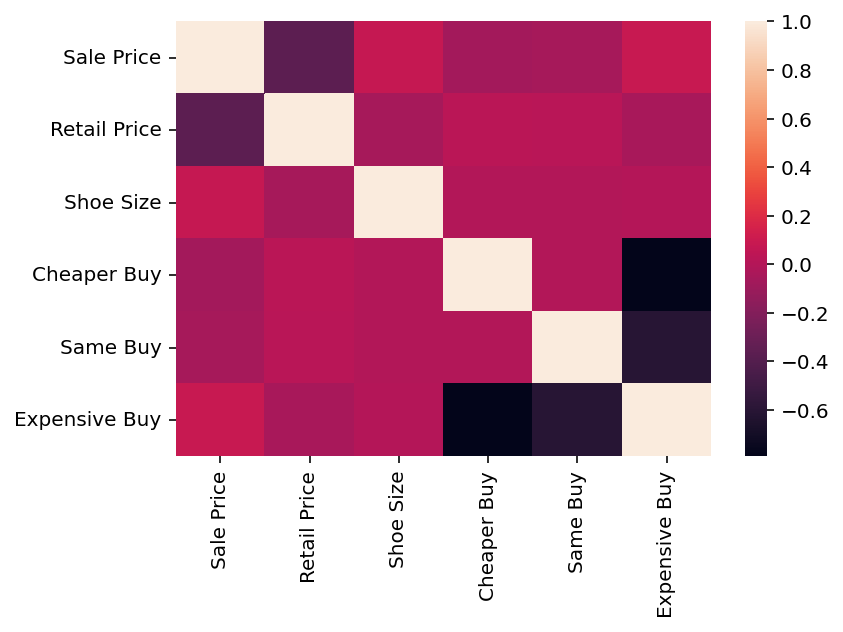

In [227]:
correlations = df.corr()
print(correlations)
sns.heatmap(correlations)

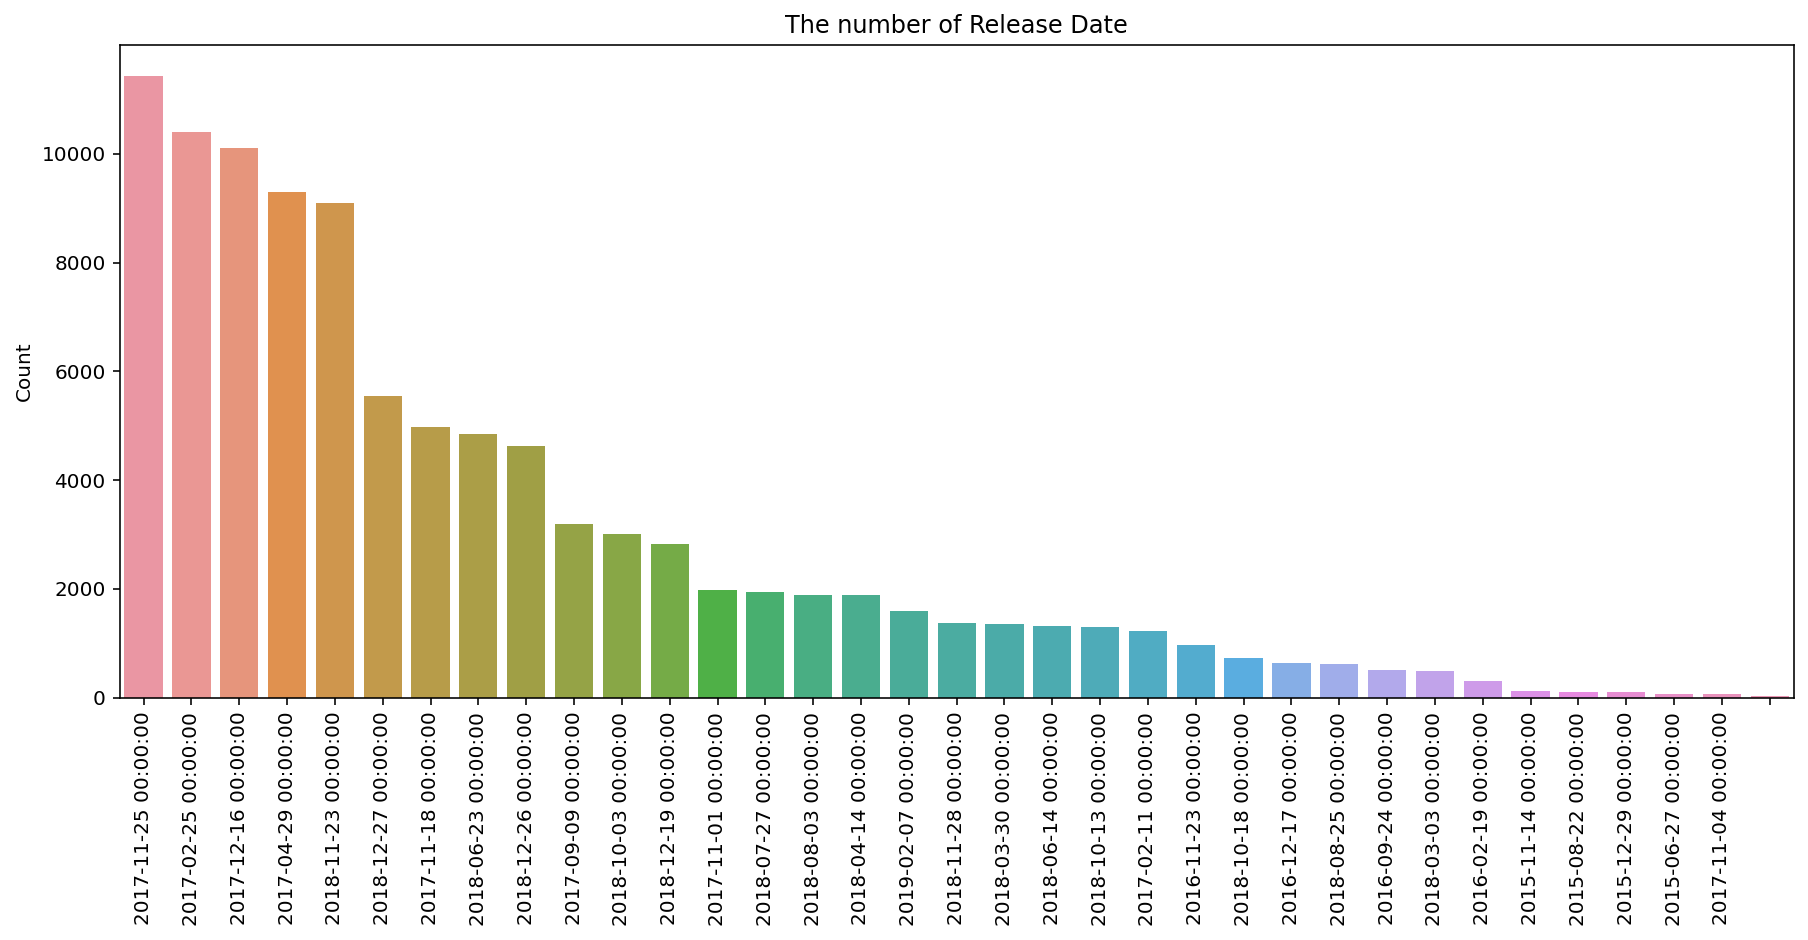

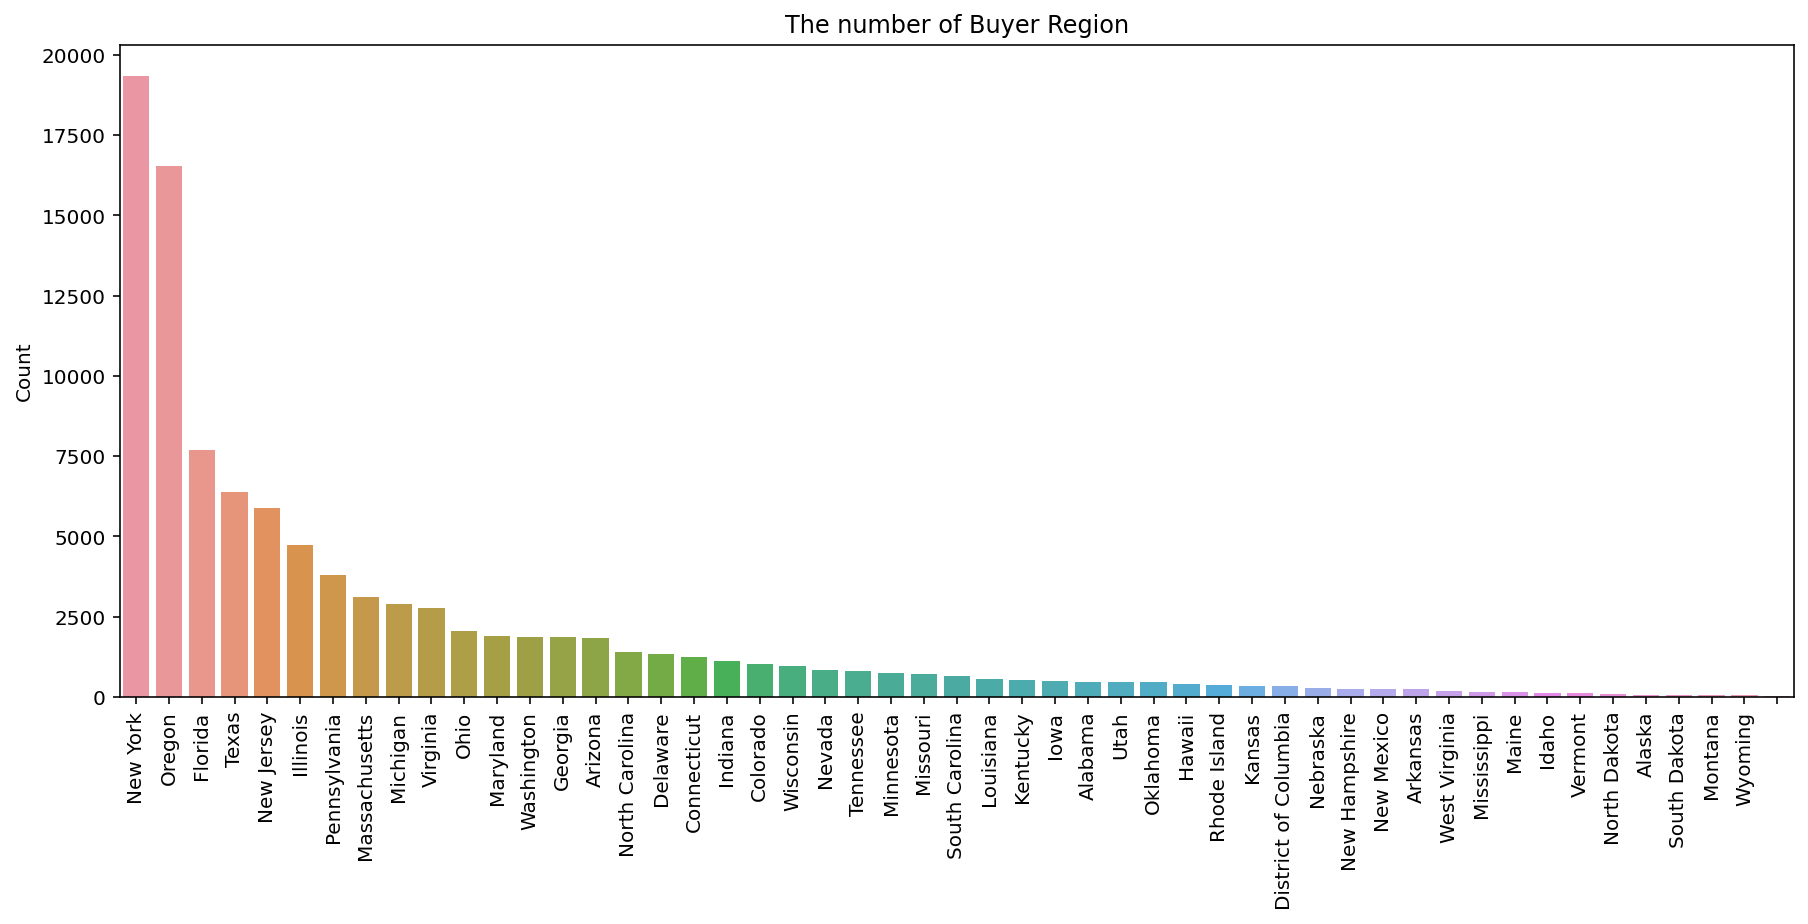

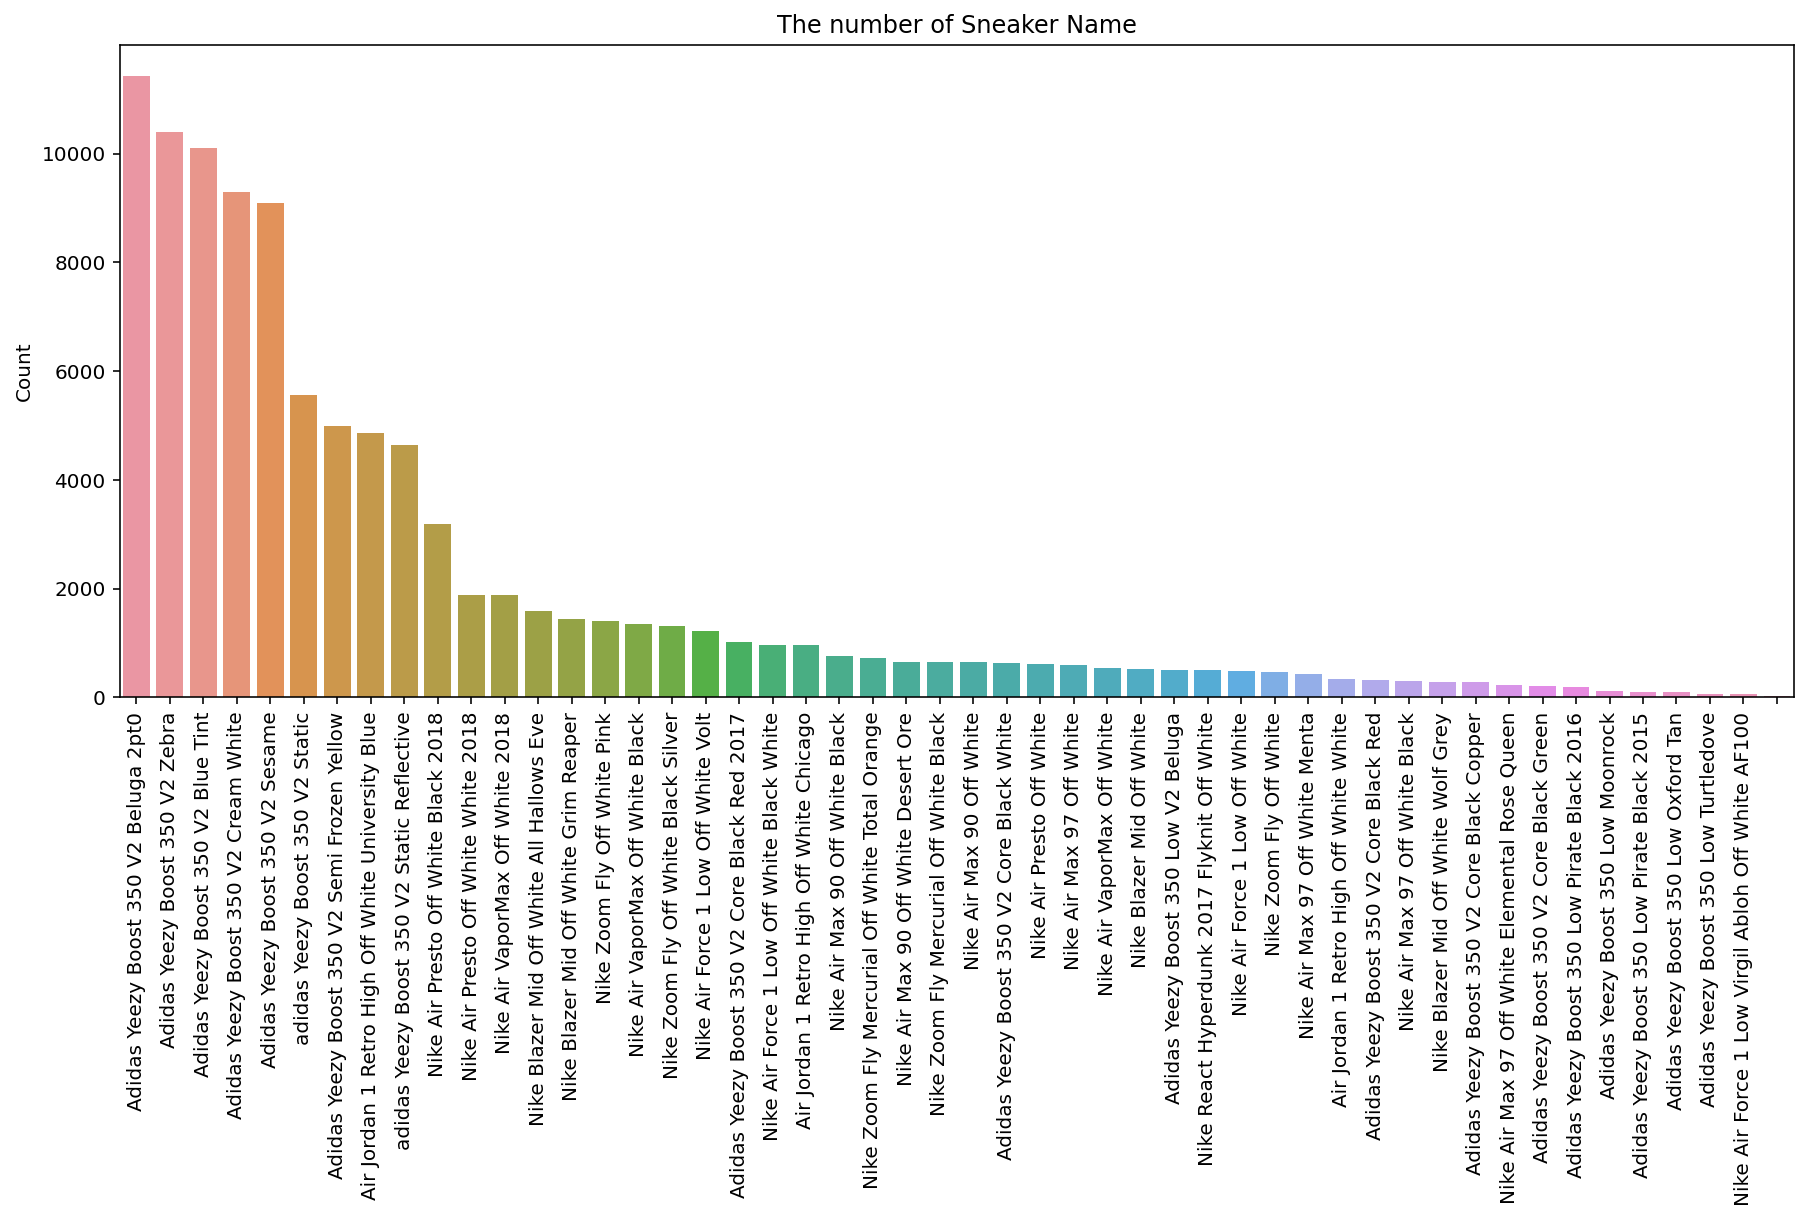

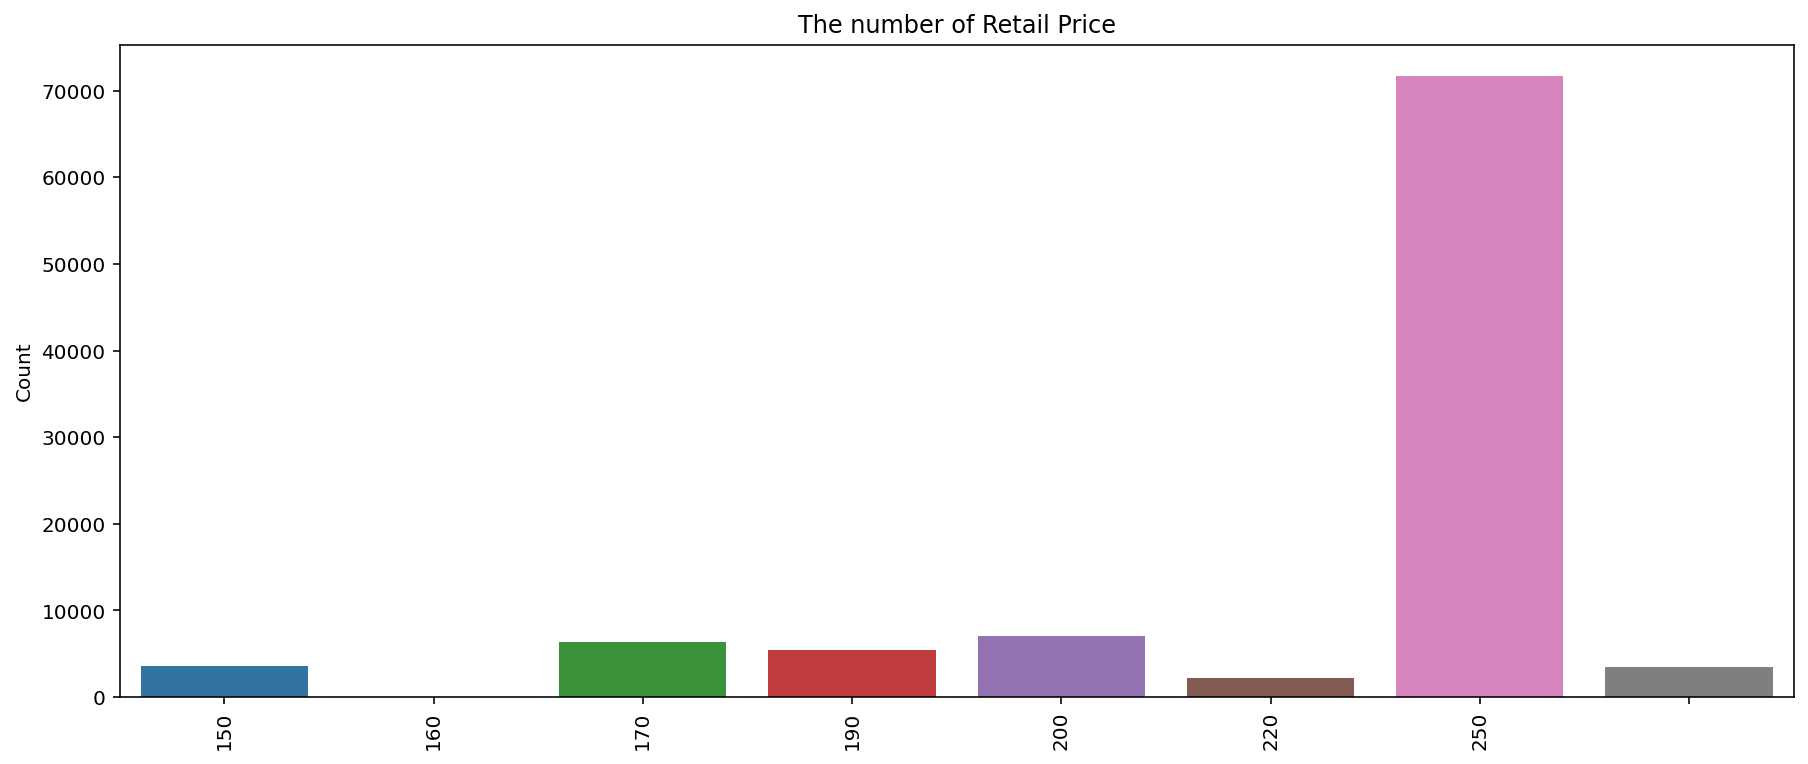

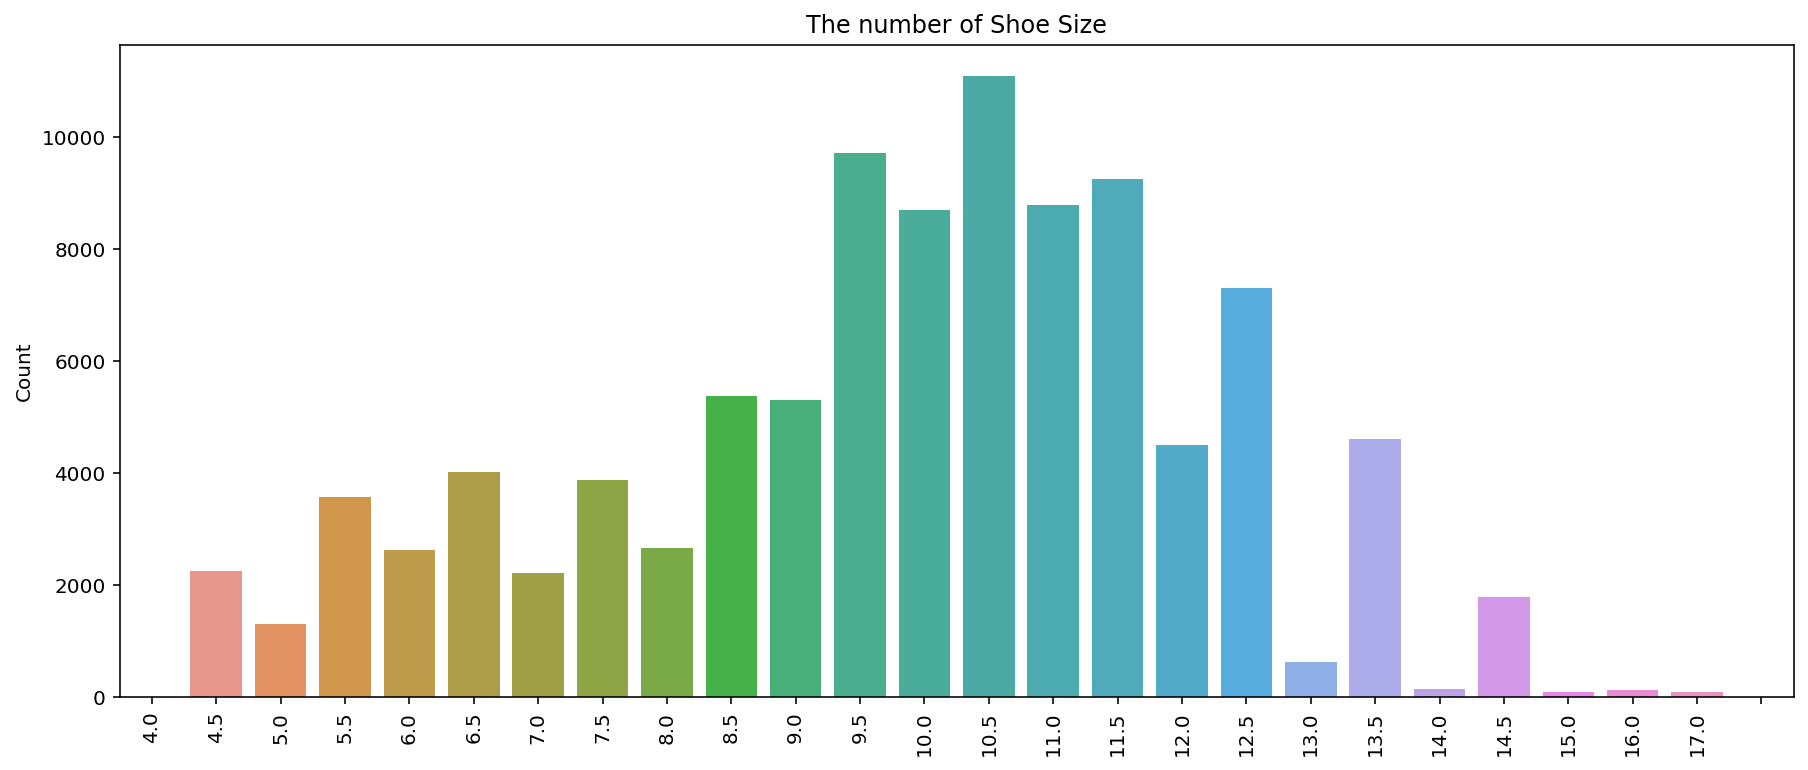

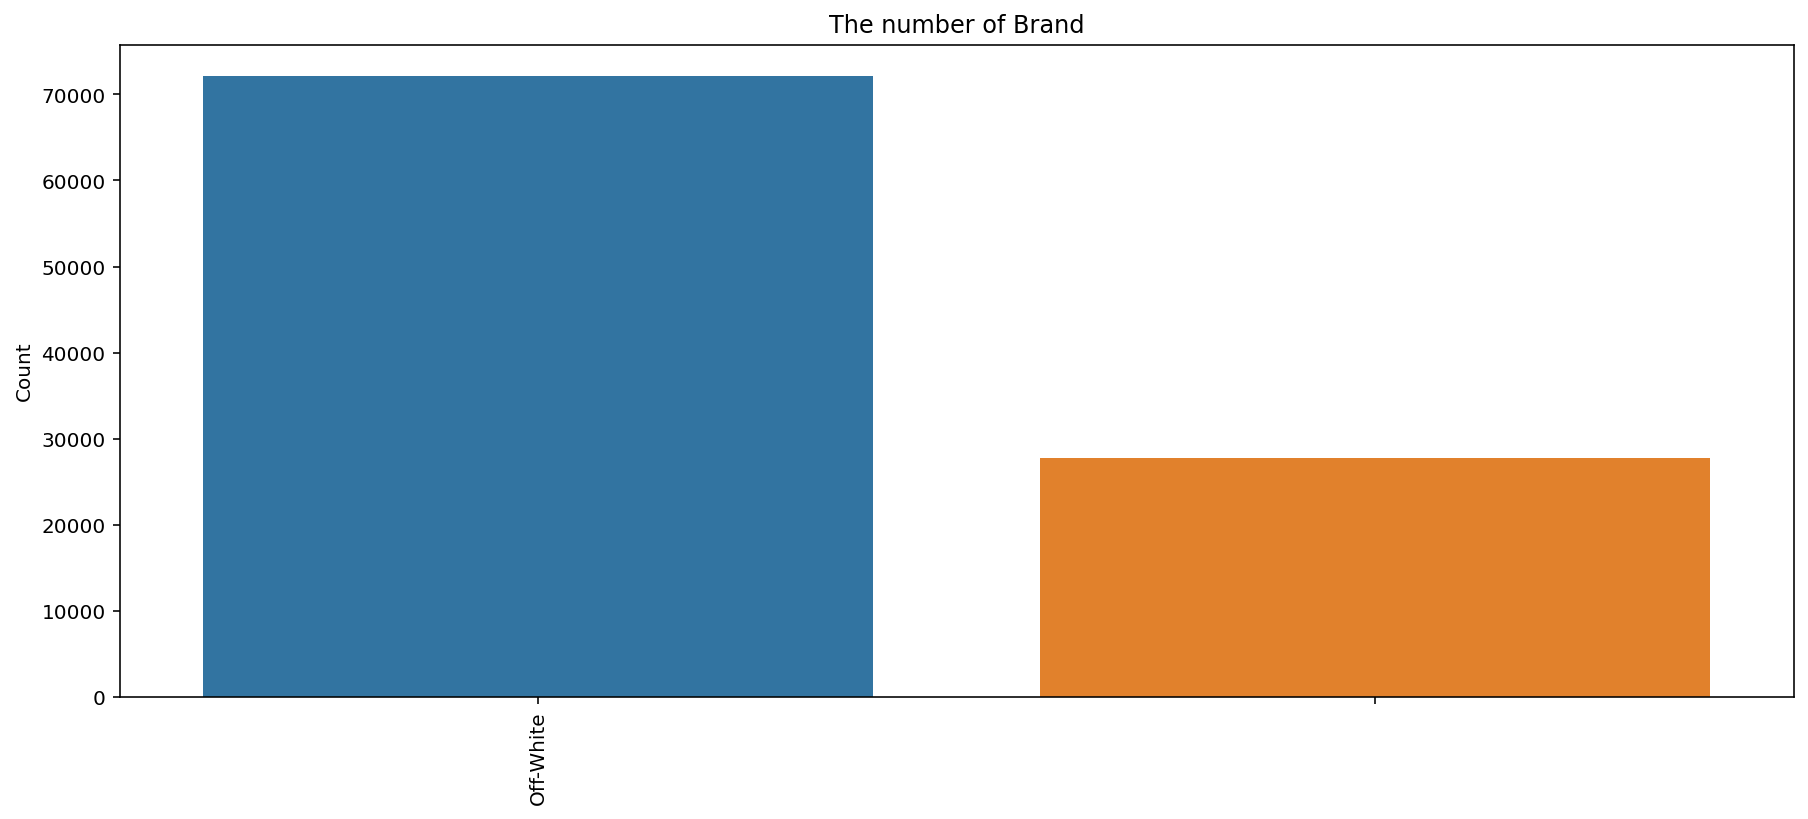

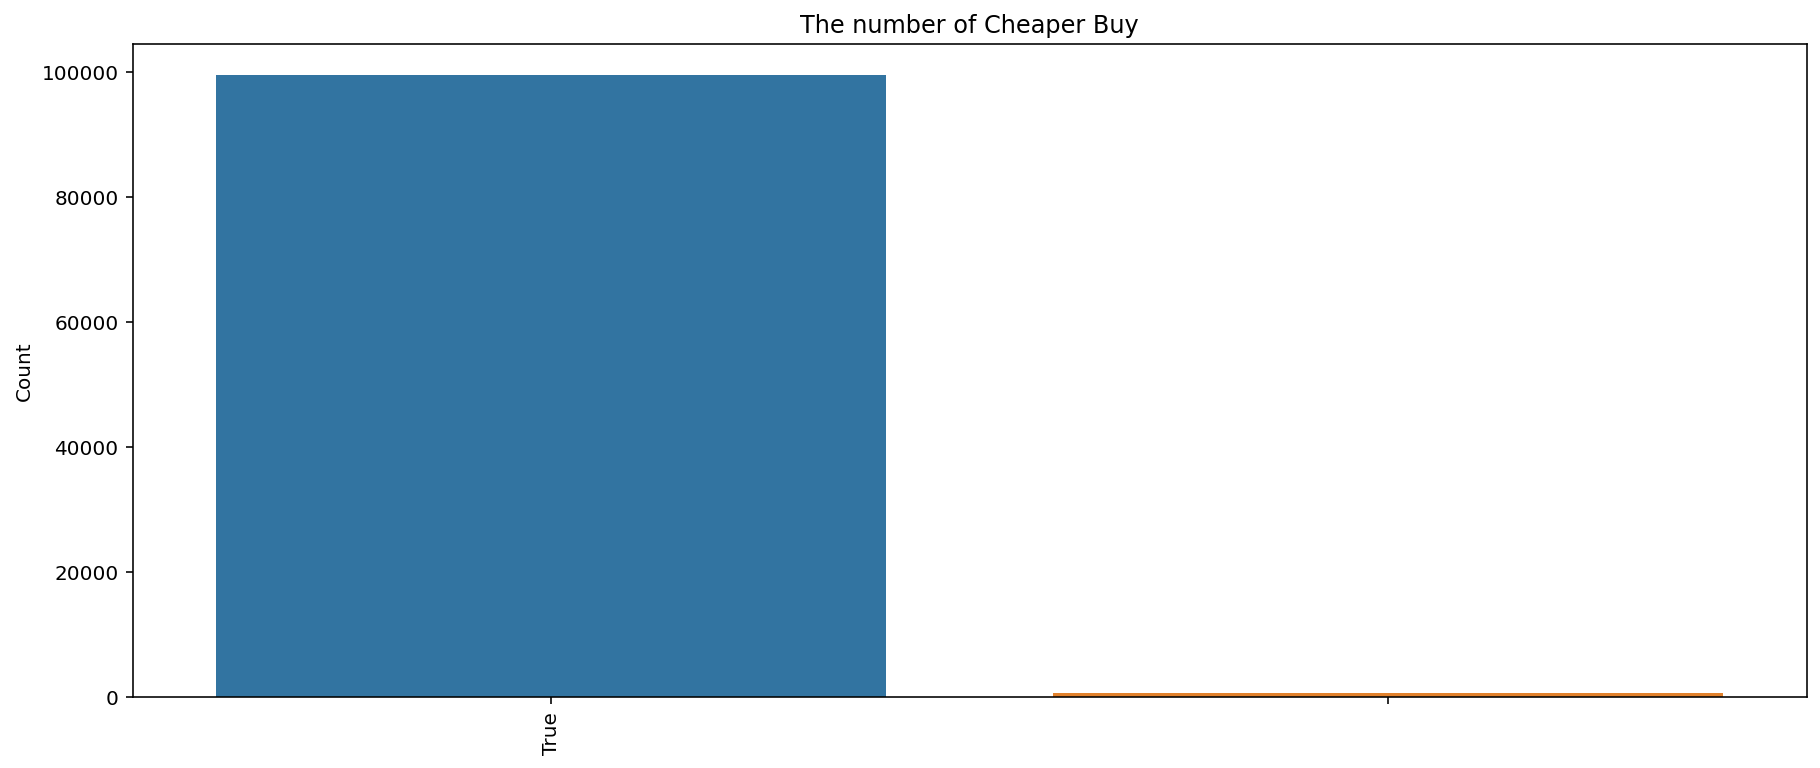

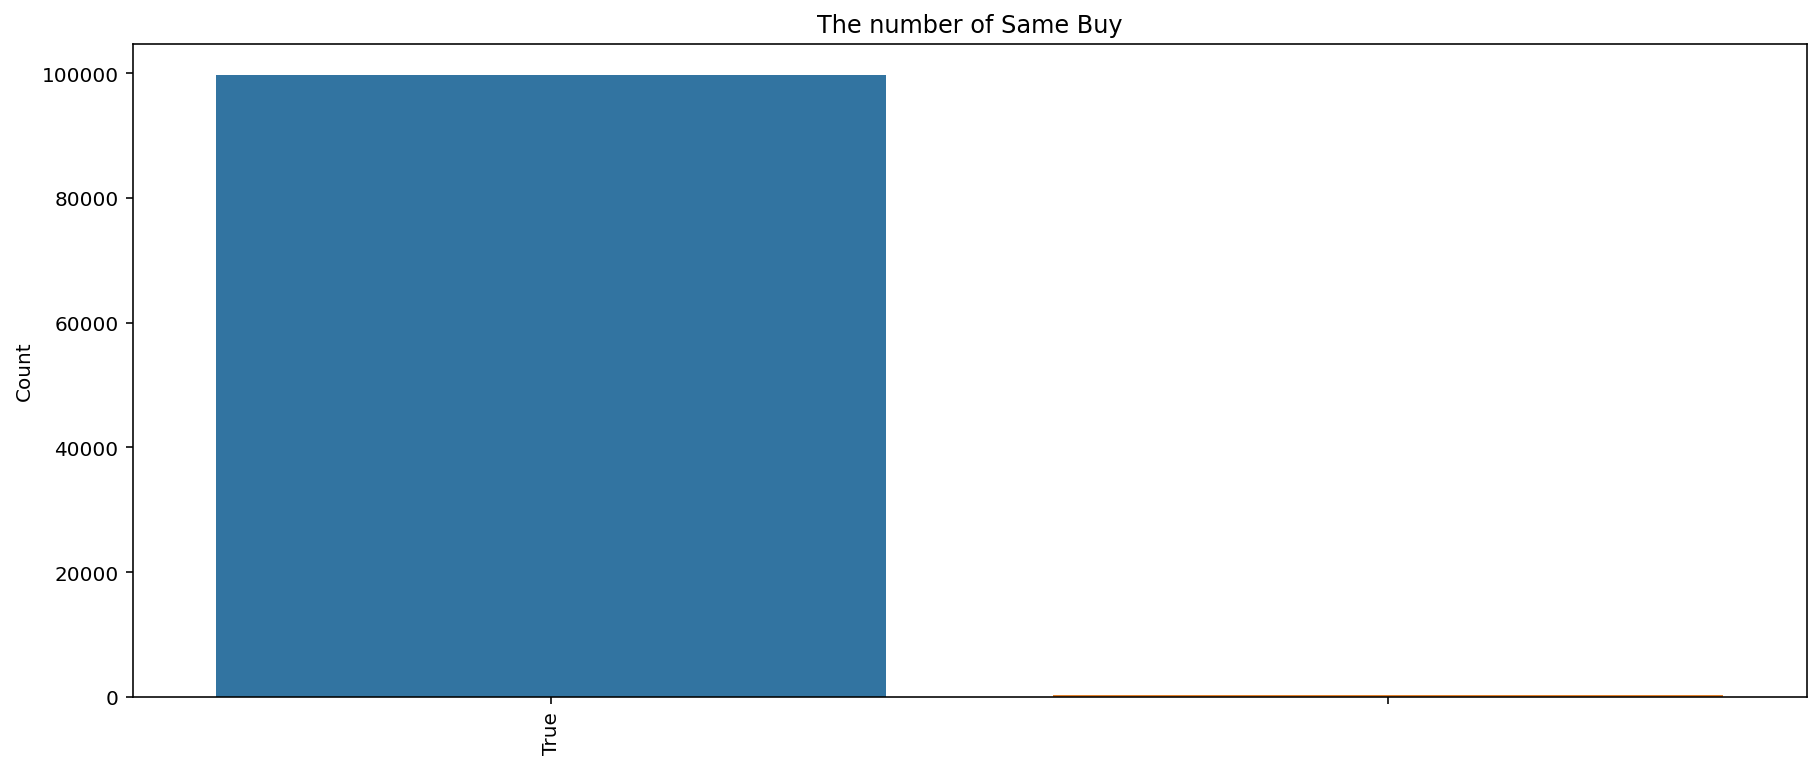

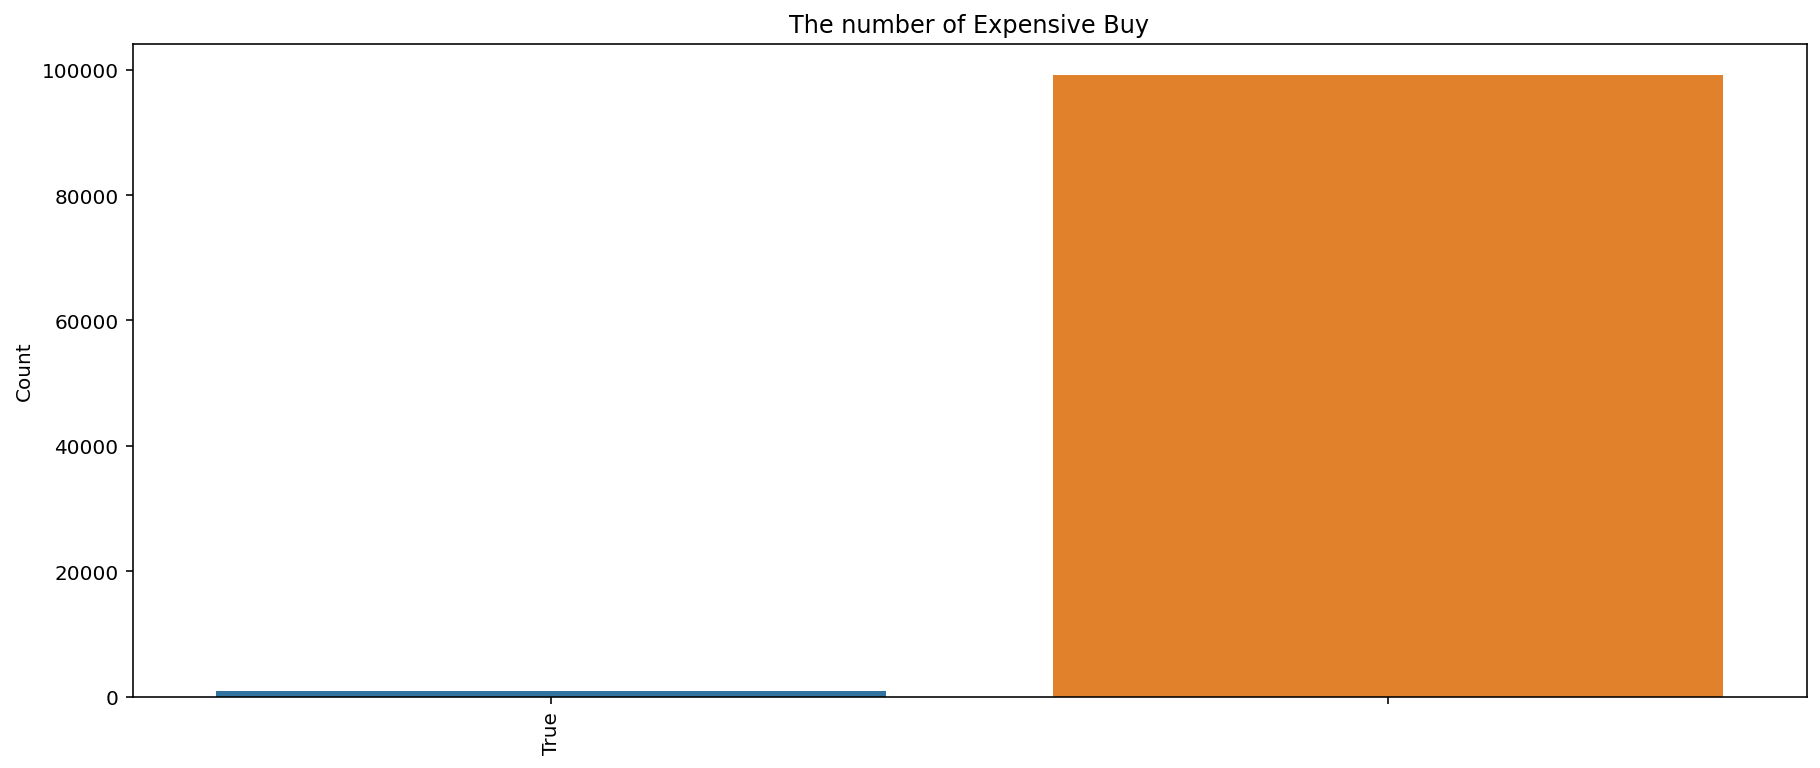

Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]),

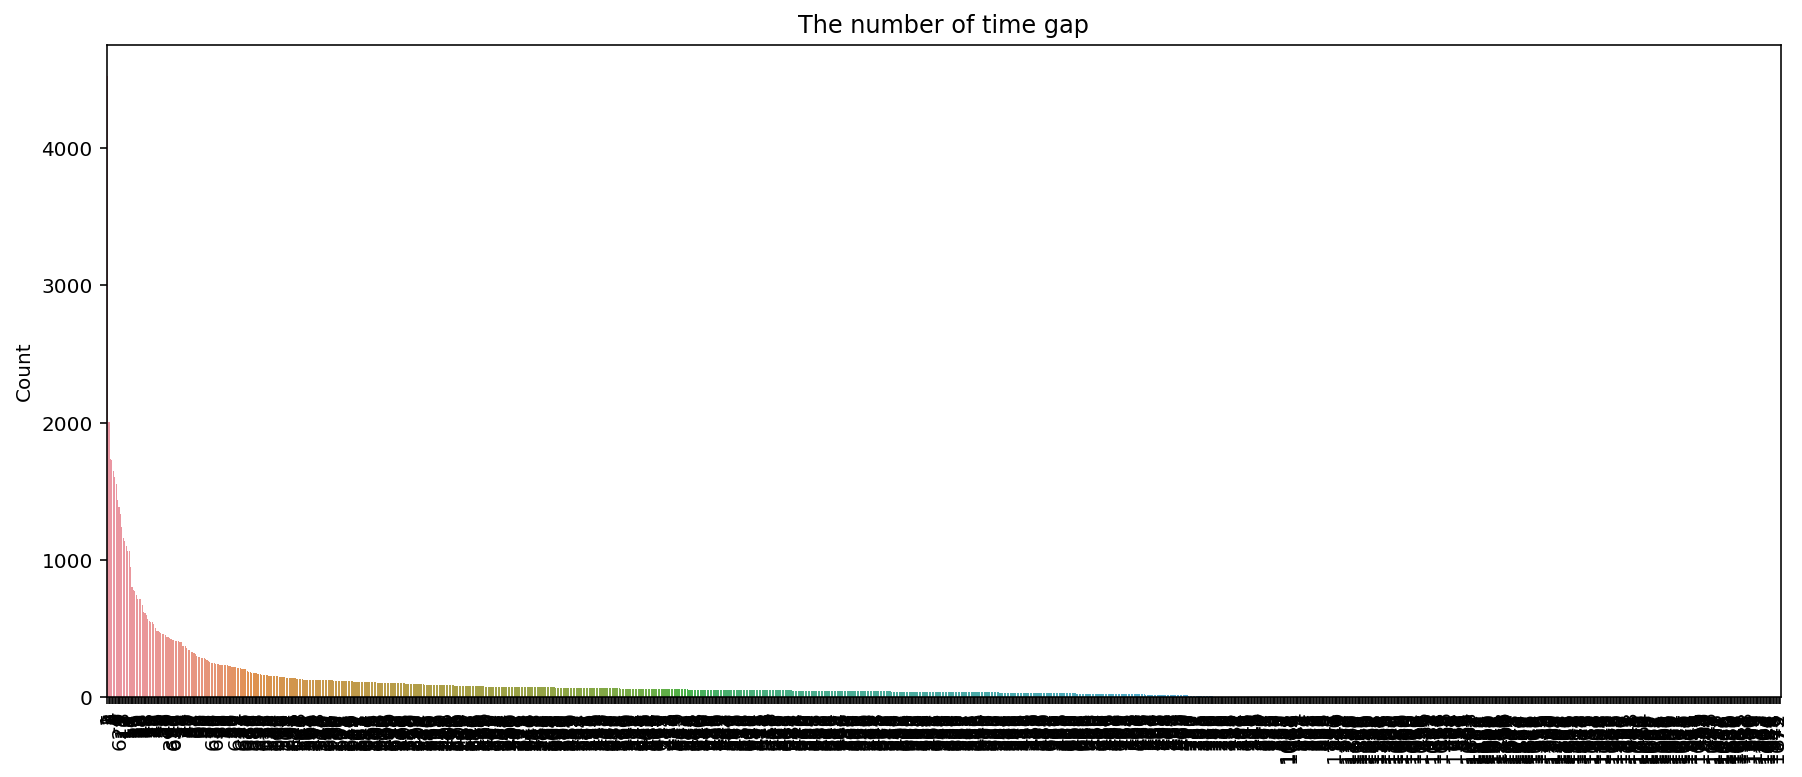

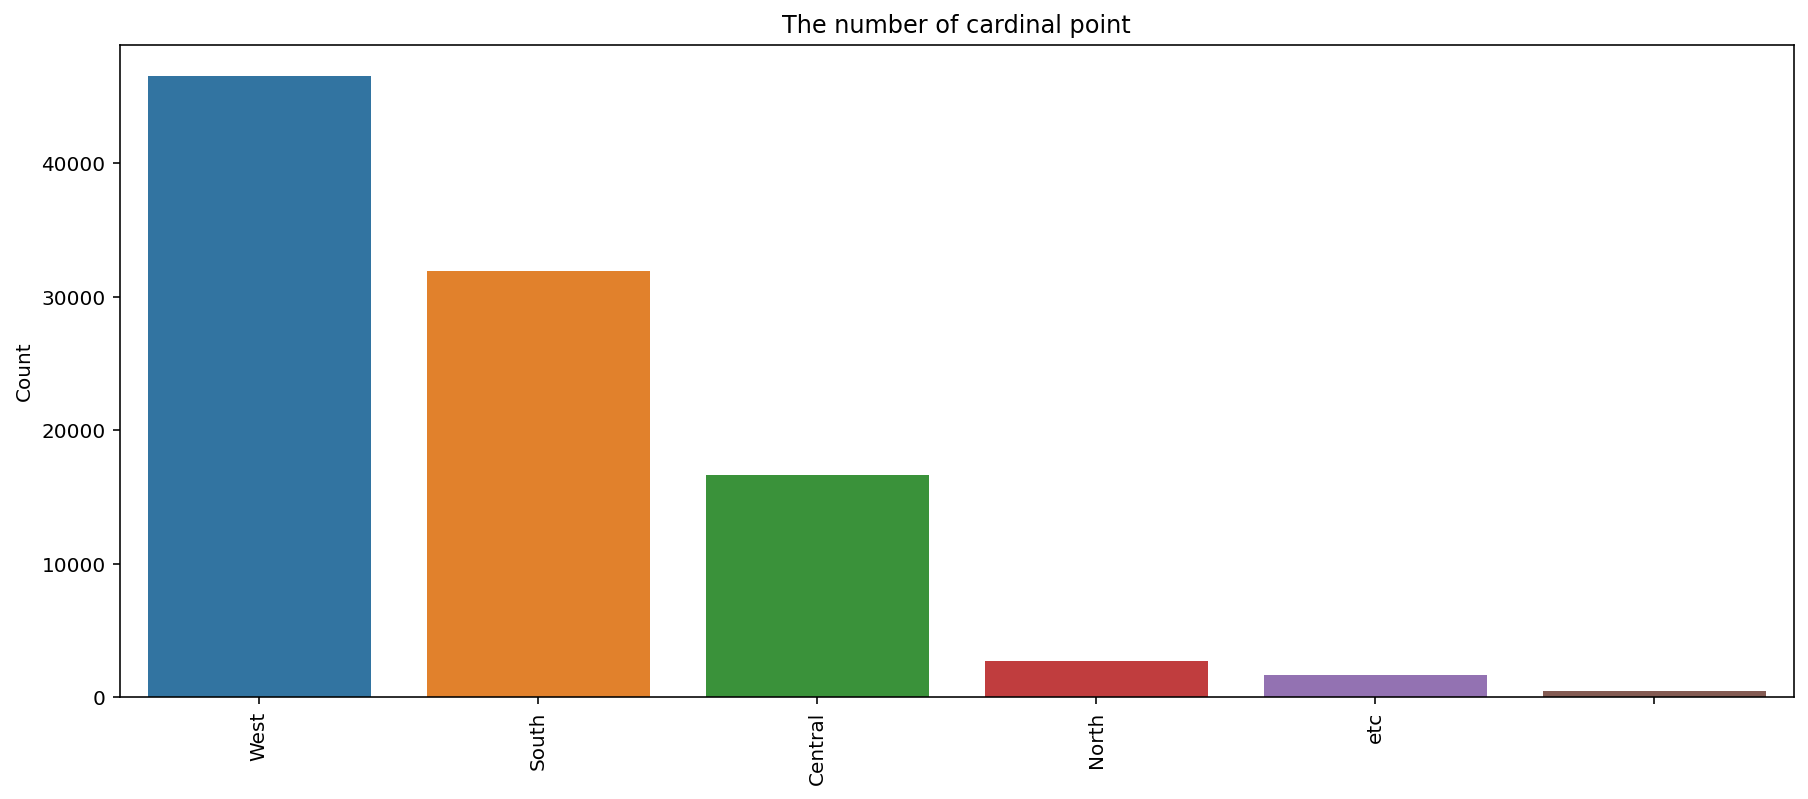

In [228]:
df_cate = ['Release Date','Buyer Region','Sneaker Name',
          'Retail Price','Shoe Size','Brand','Cheaper Buy','Same Buy',
          'Expensive Buy','time gap','cardinal point']

for cate in df_cate:
  cate_num = df[str(cate)].value_counts()
  plt.figure(figsize=(15,6))
  chart = sns.barplot(x = cate_num.index, y=cate_num)
  chart.set_title(f"The number of {cate}")
  plt.ylabel("Count")
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
  plt.show(15)

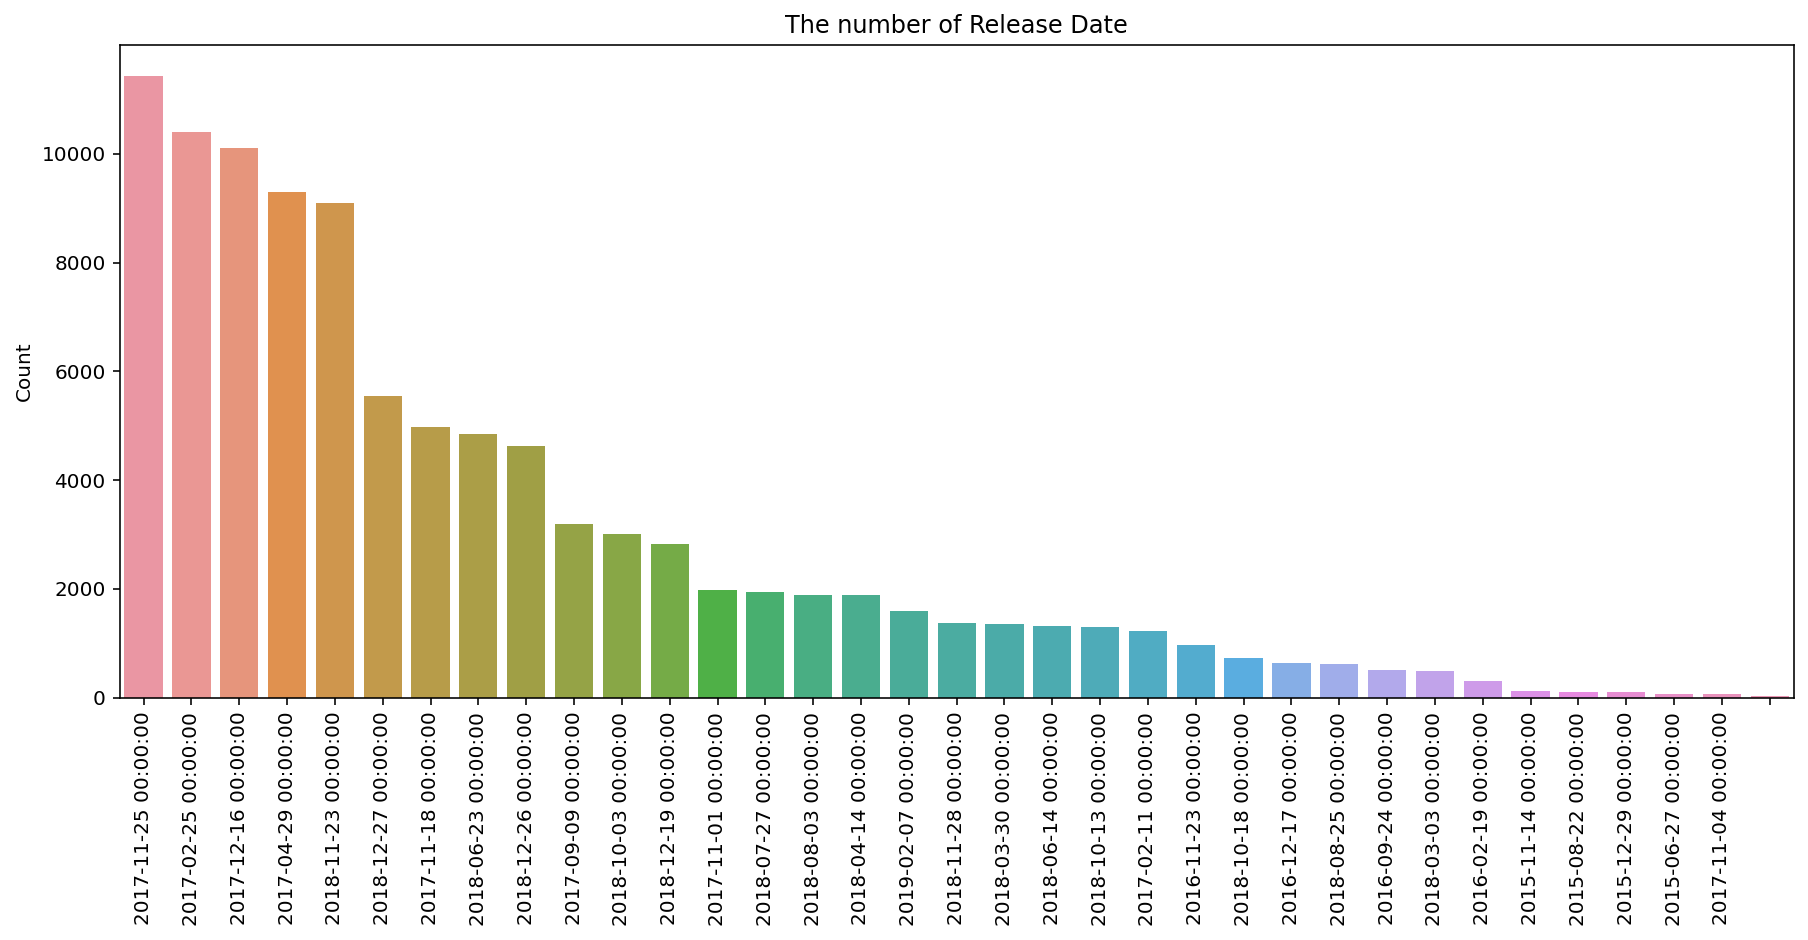

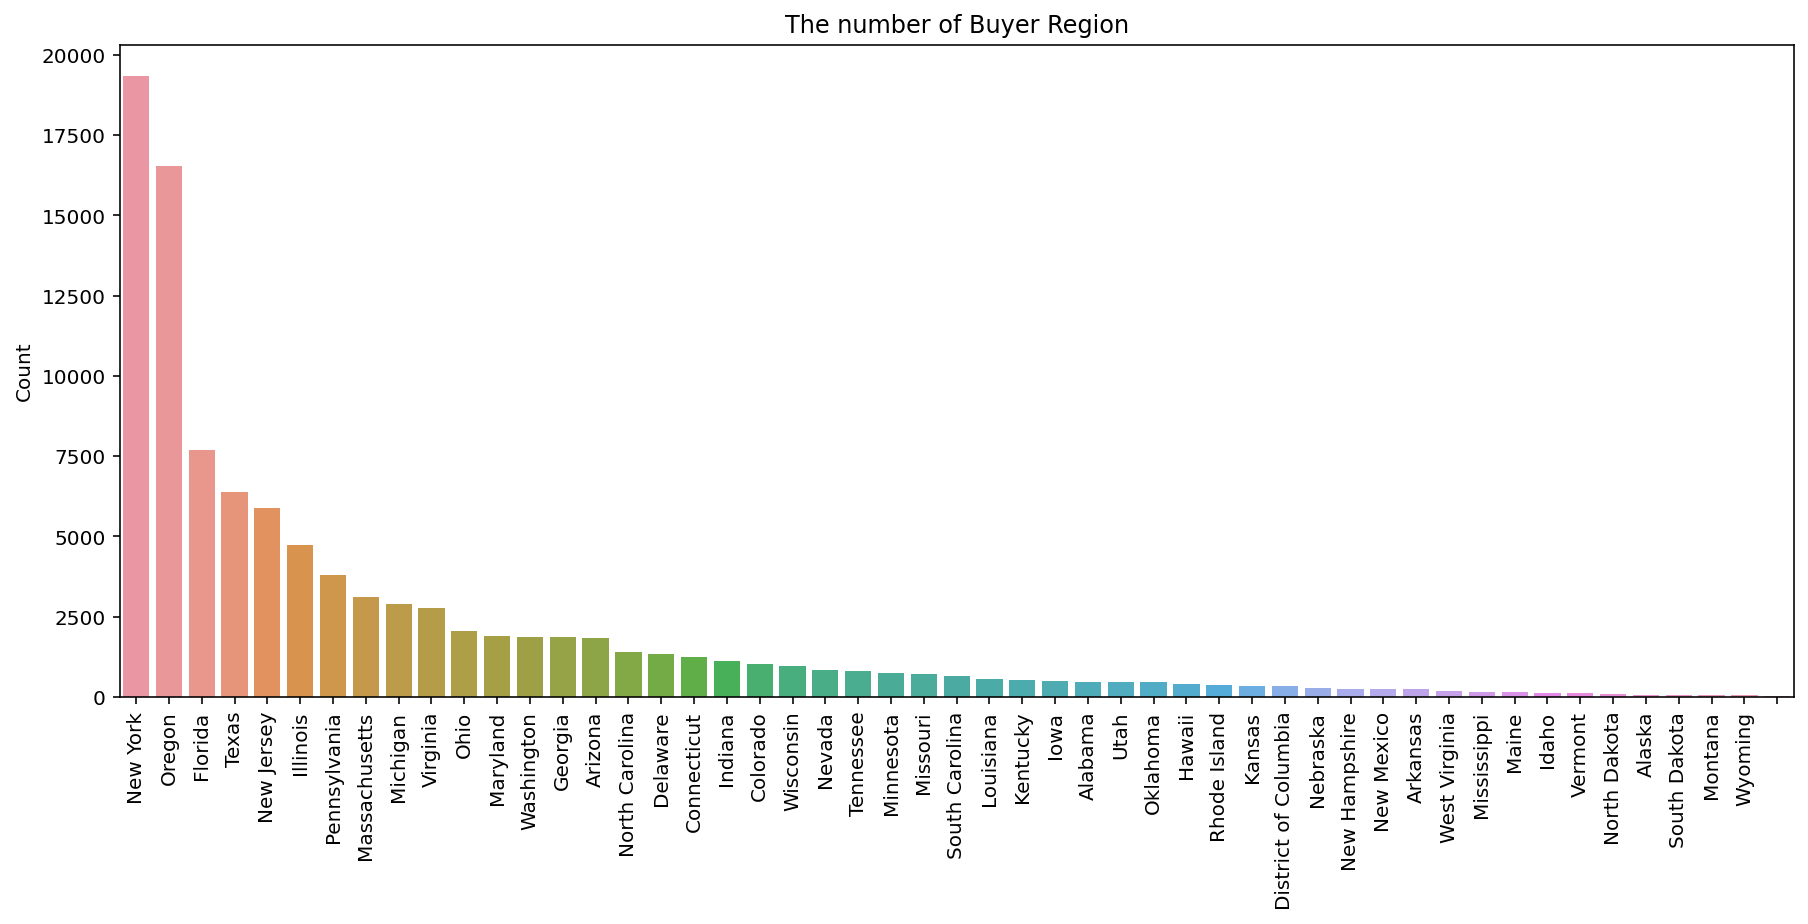

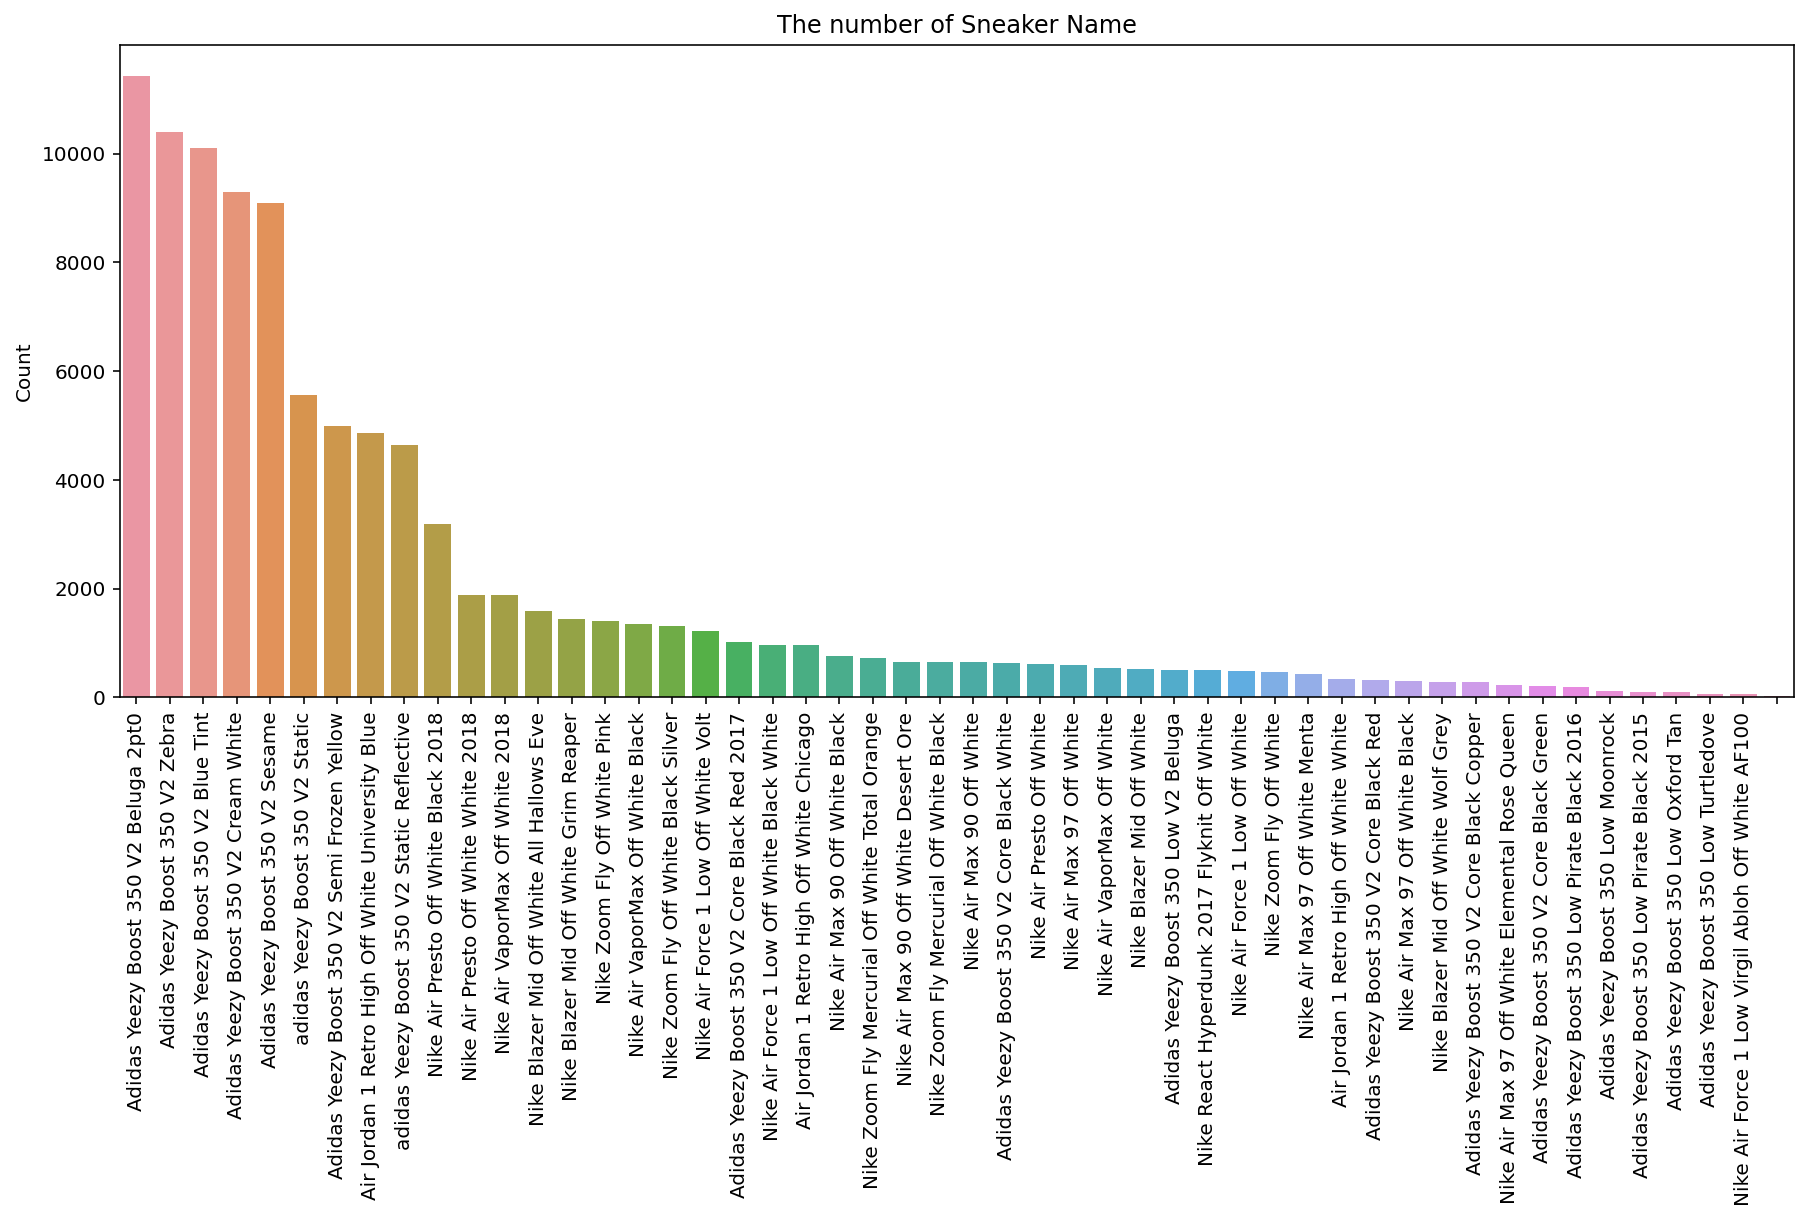

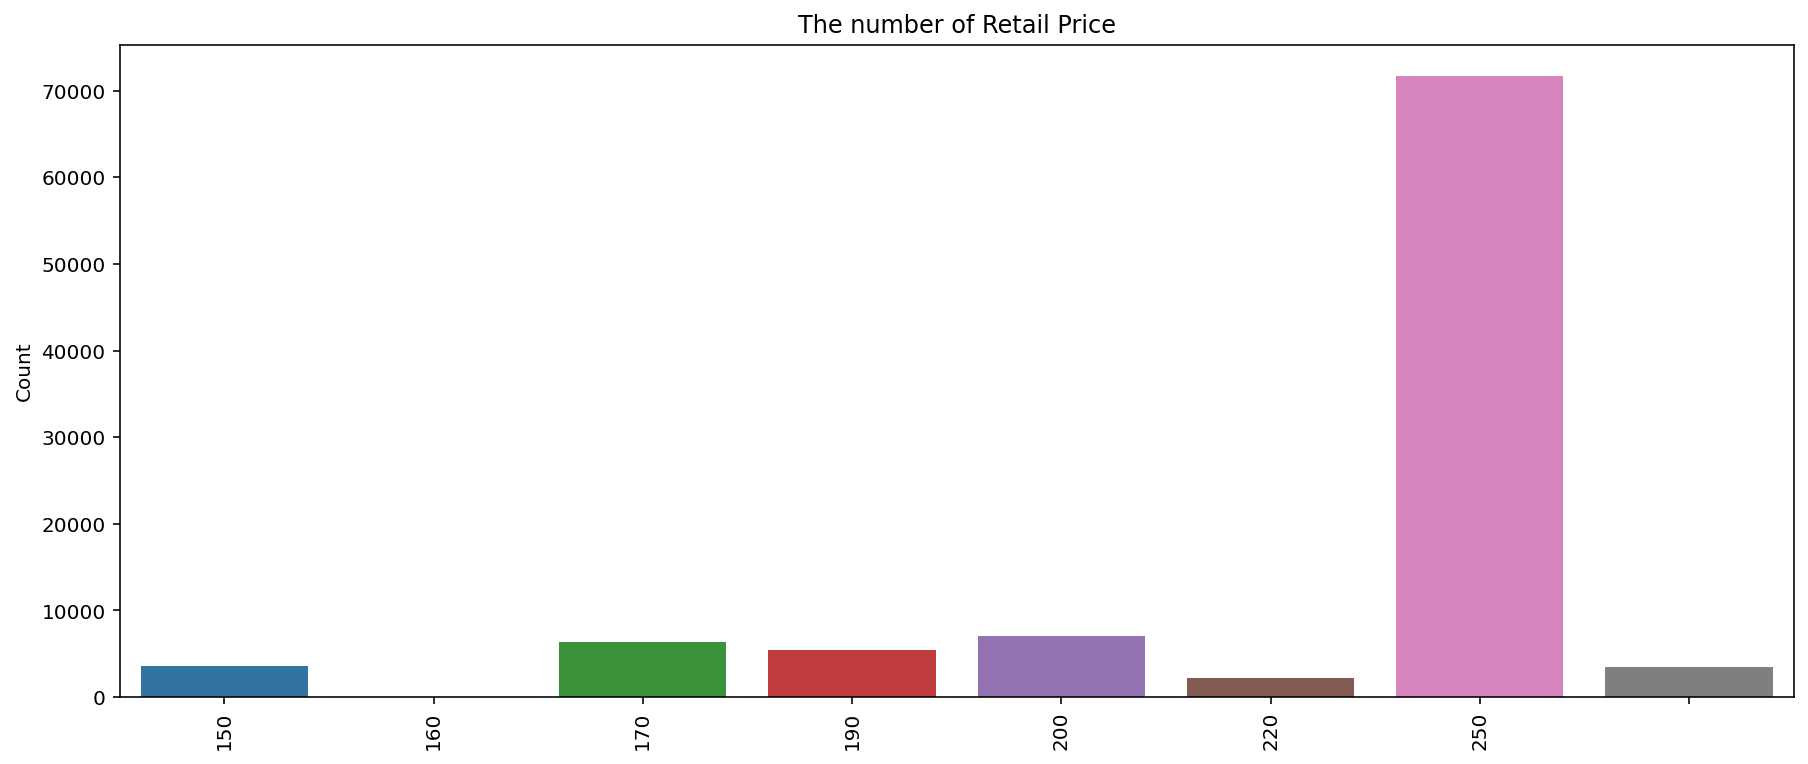

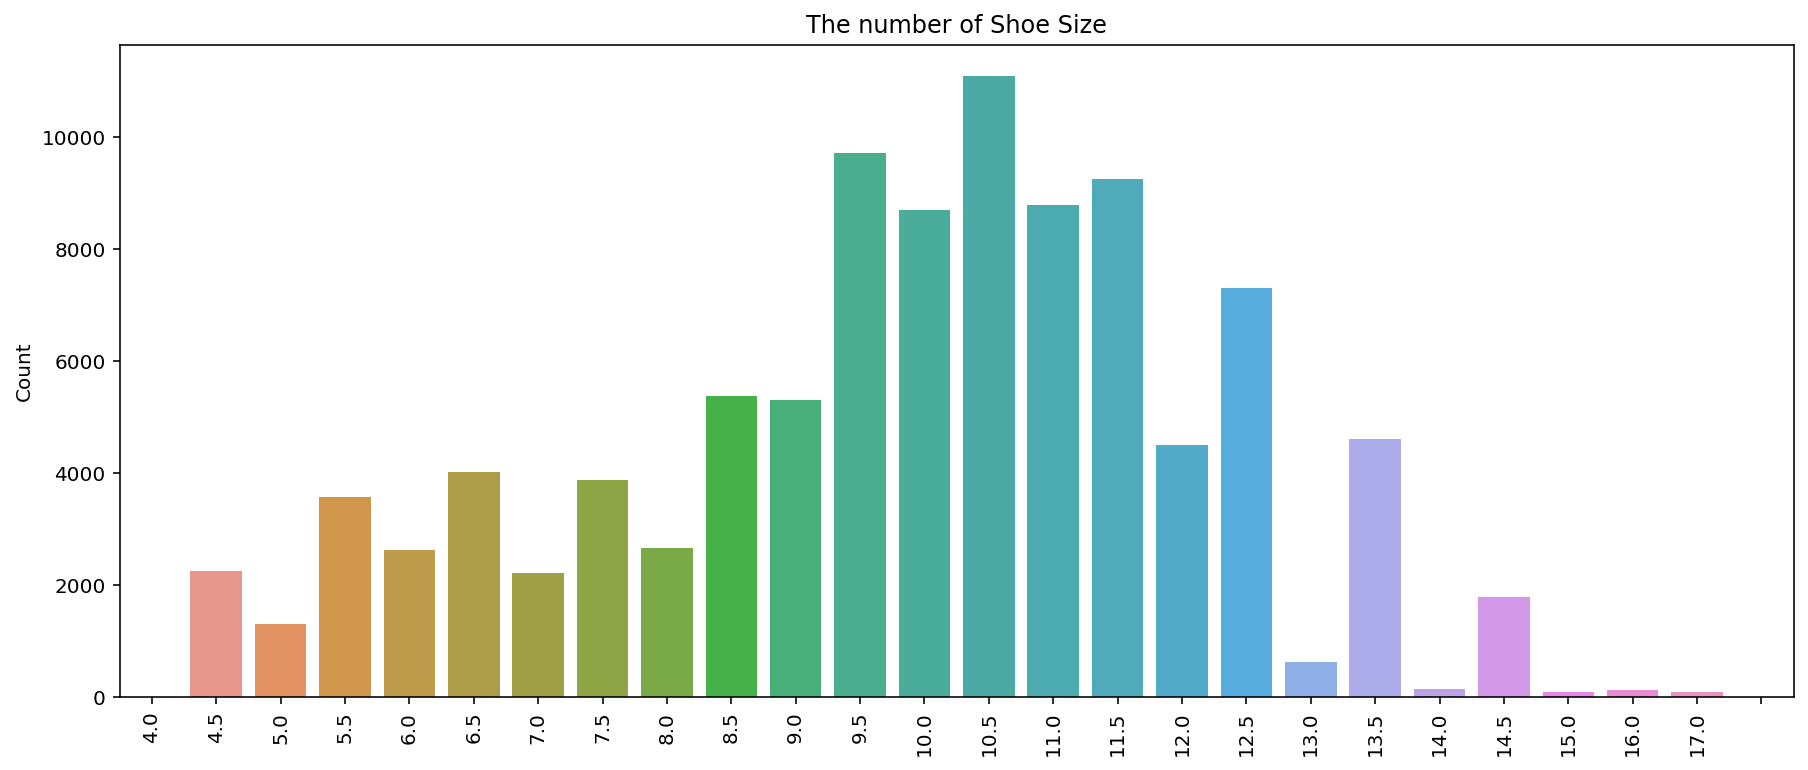

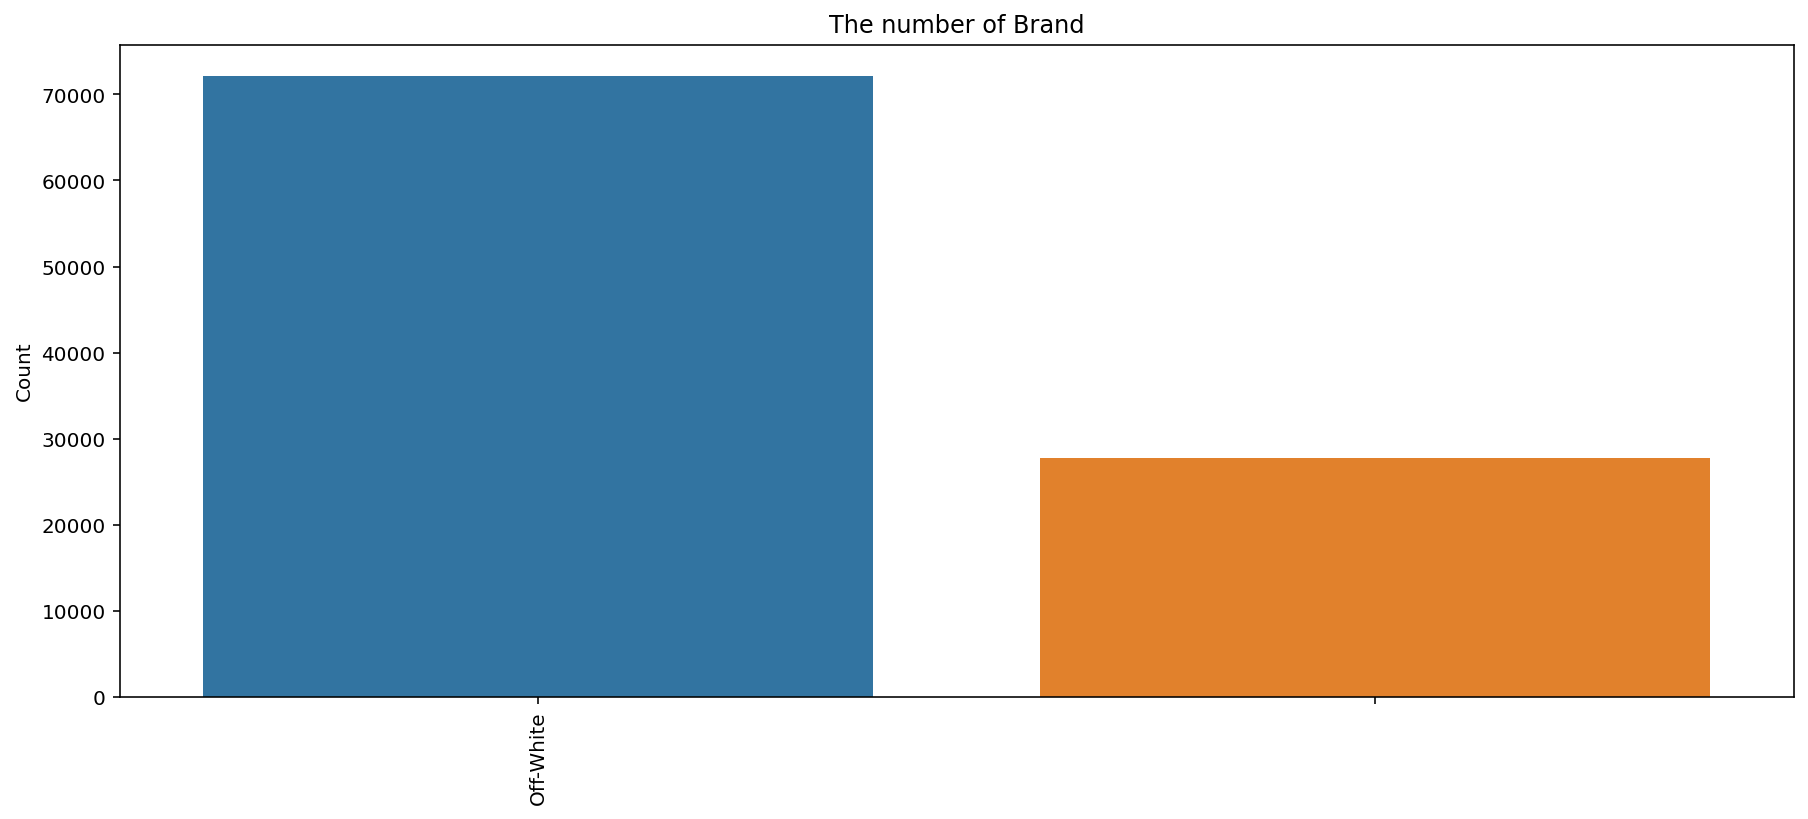

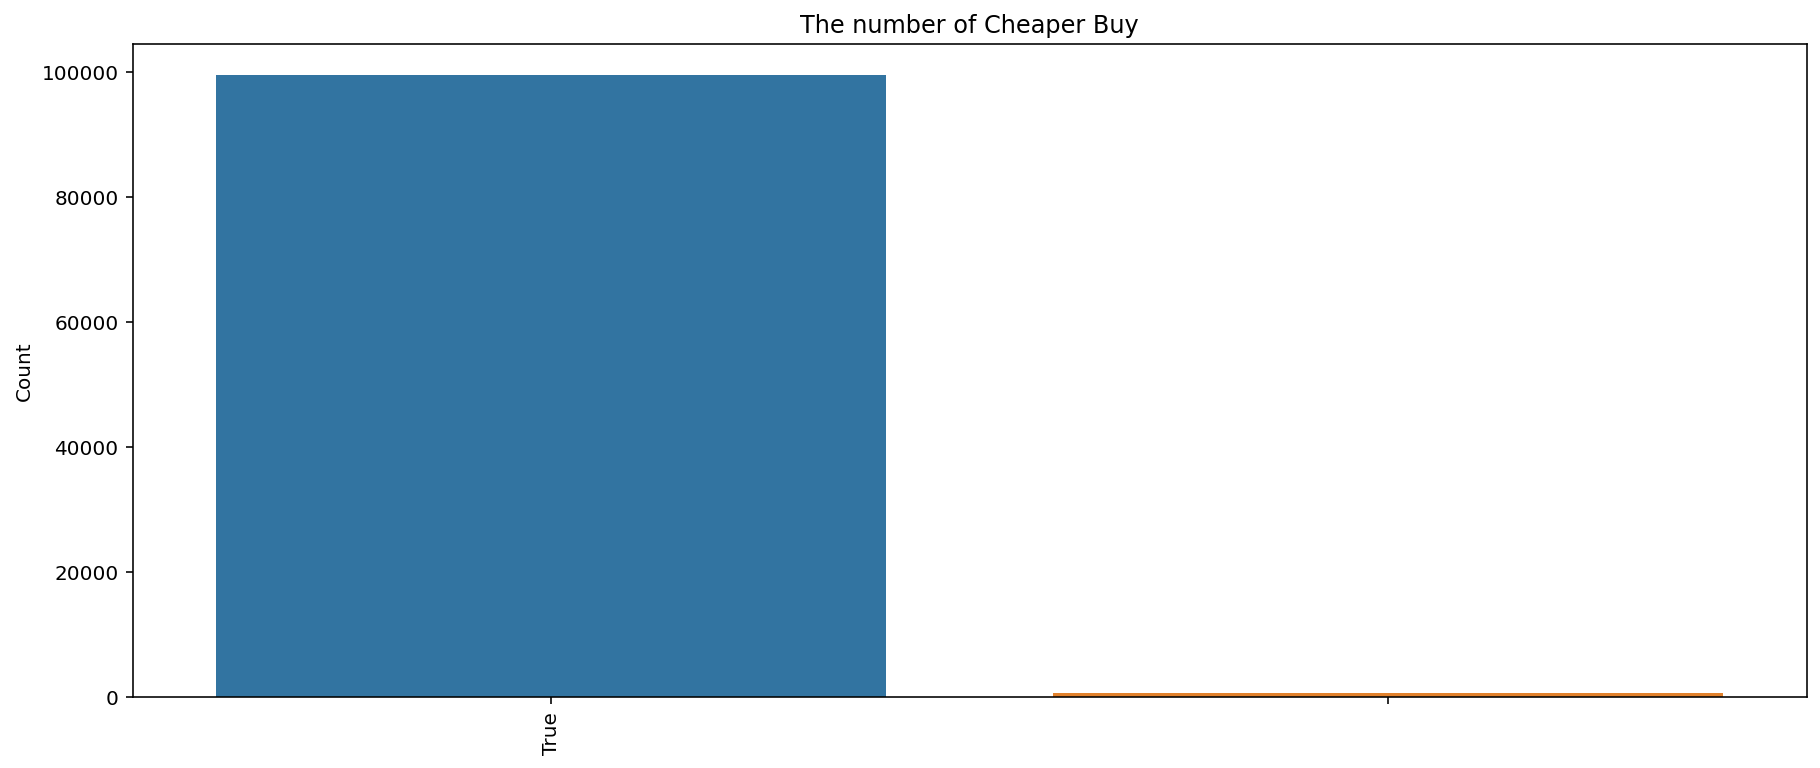

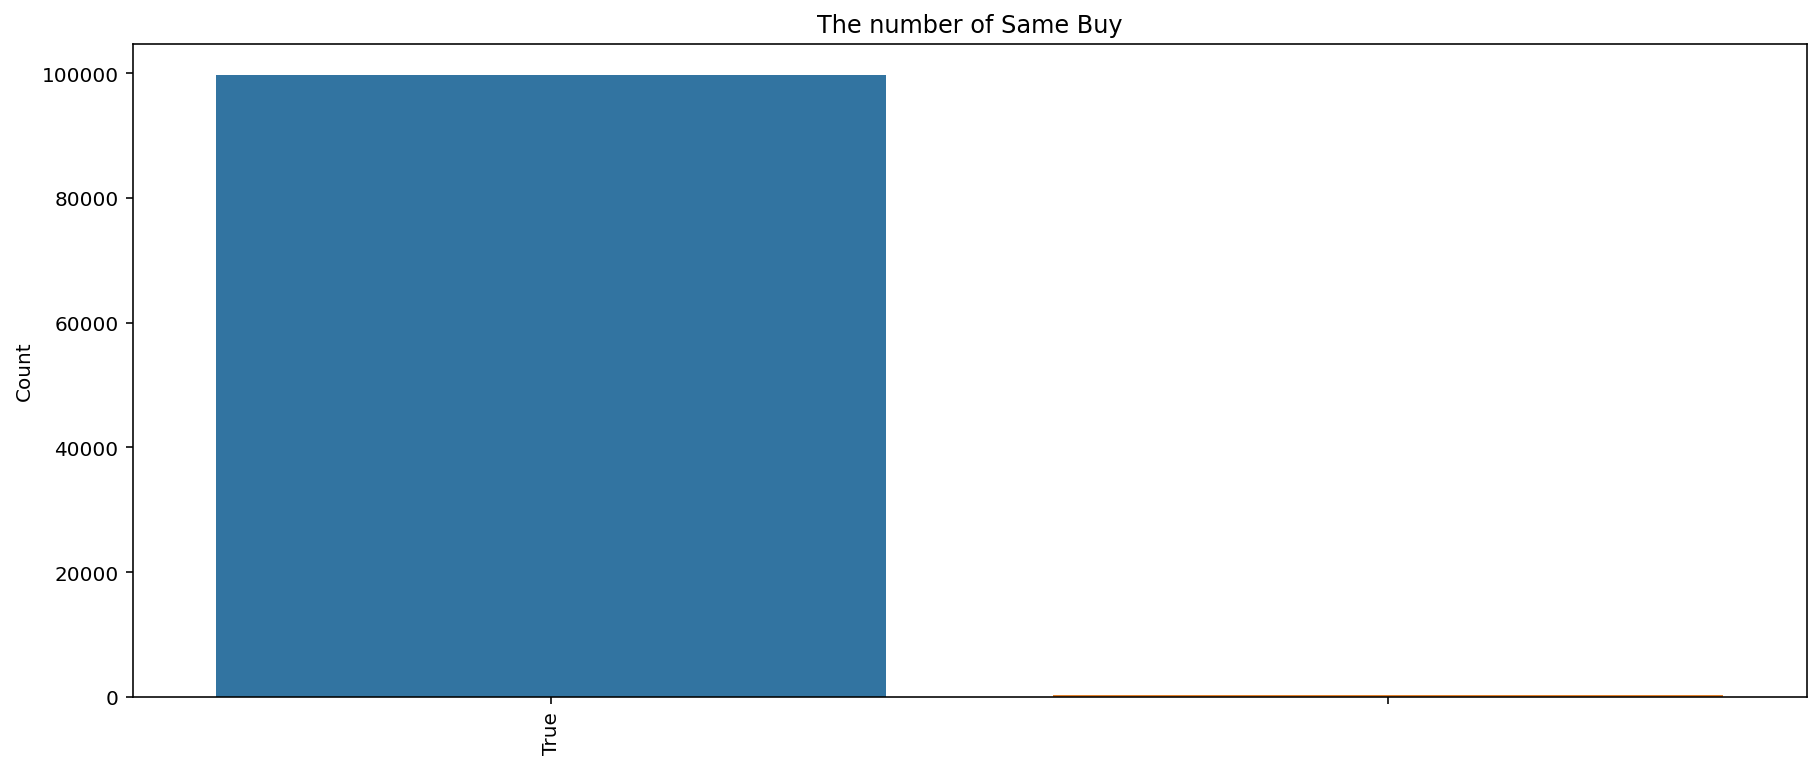

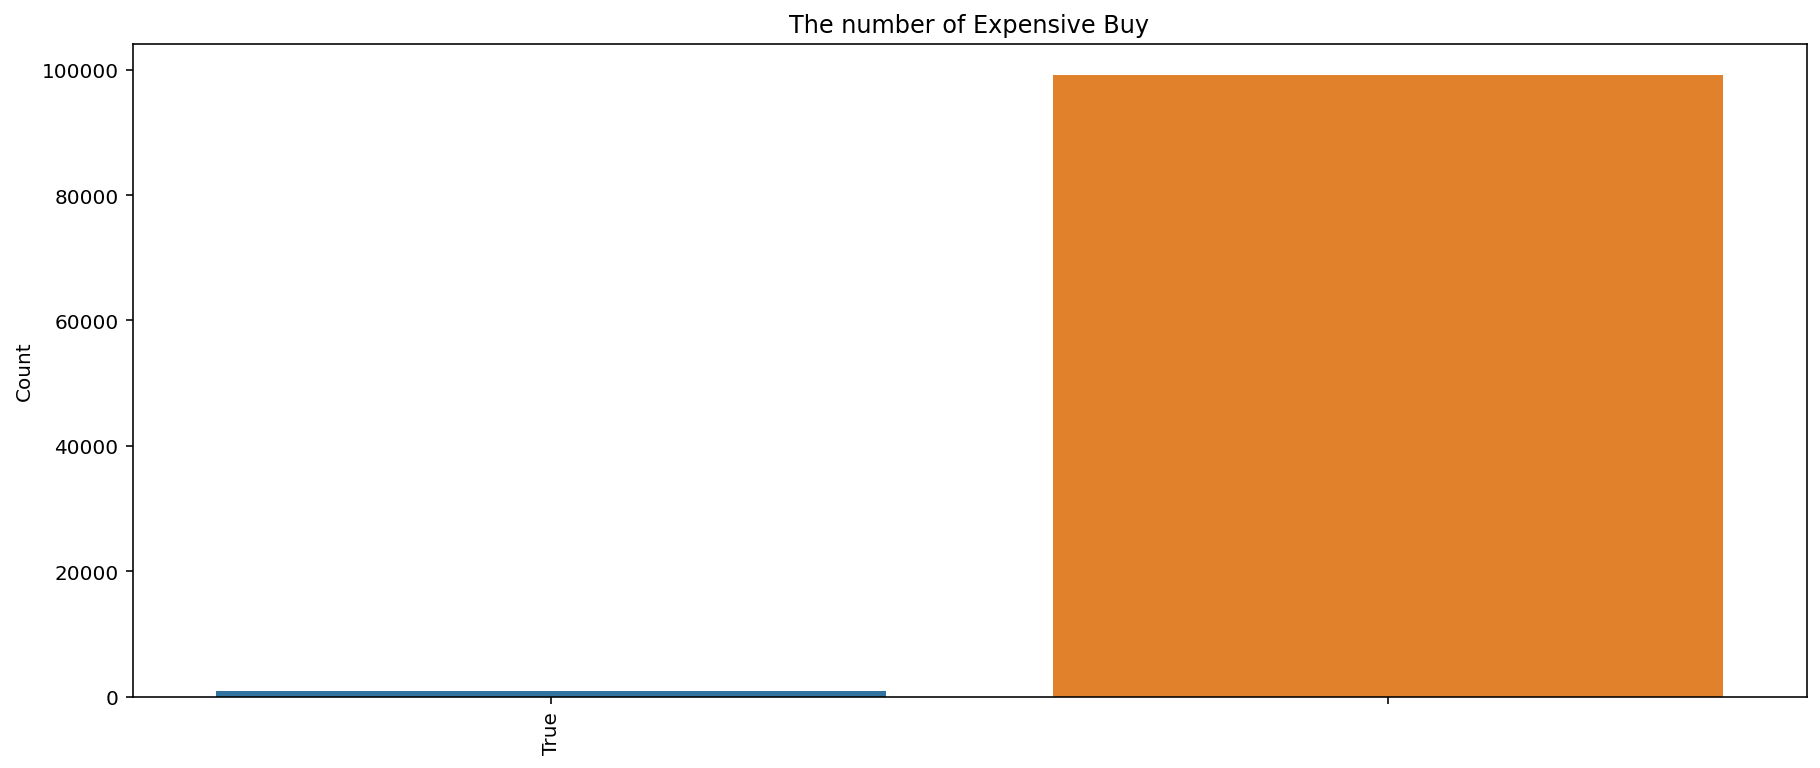

Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1163 ticks ([-1.0, ..., 1161.0]),

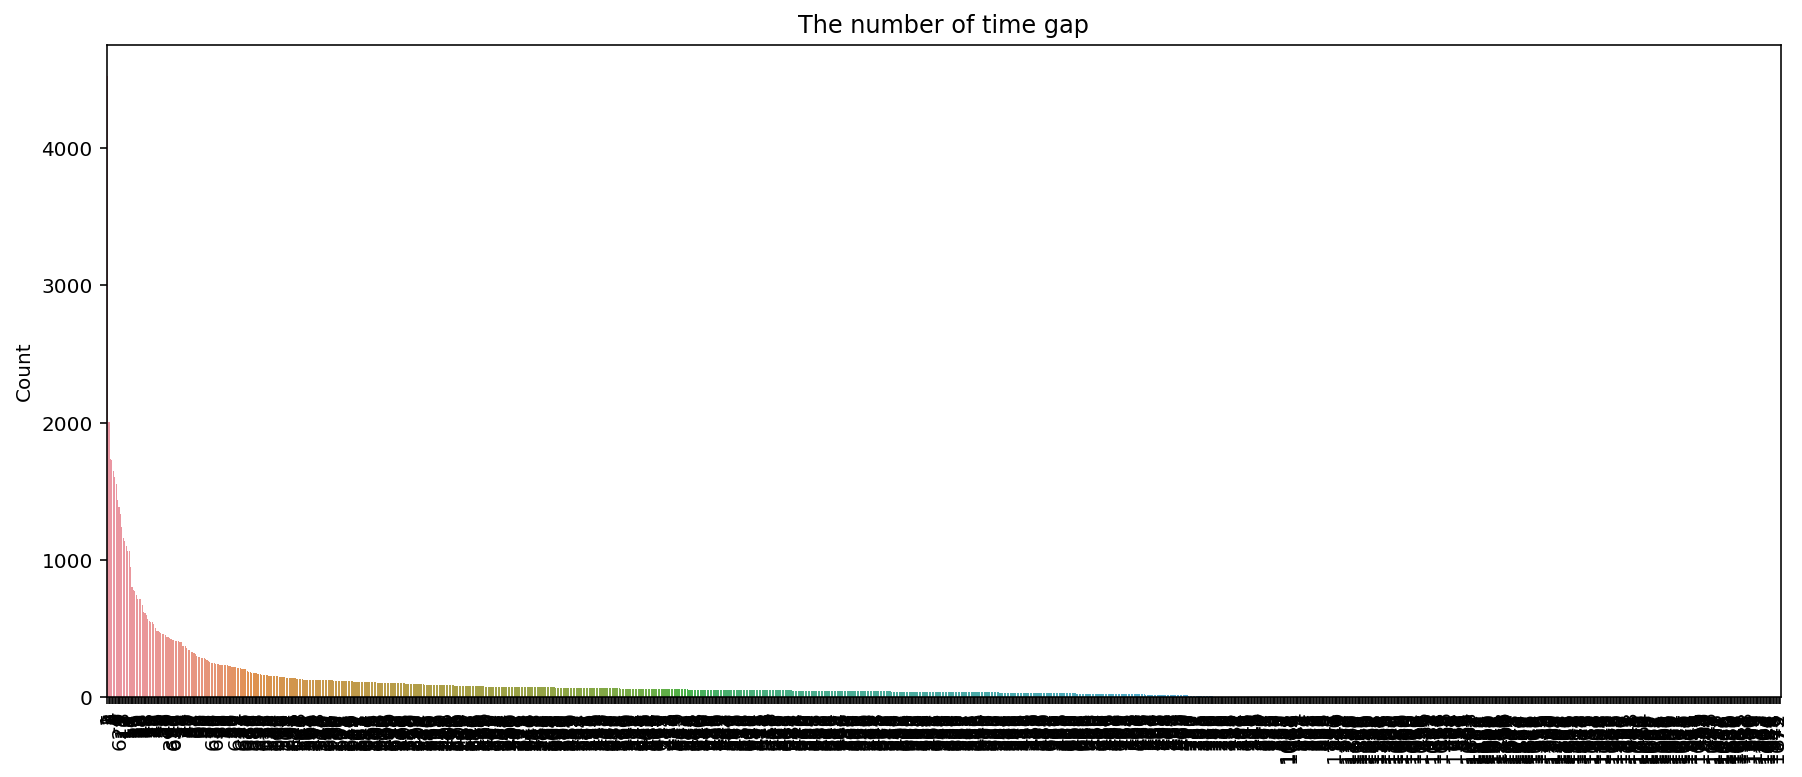

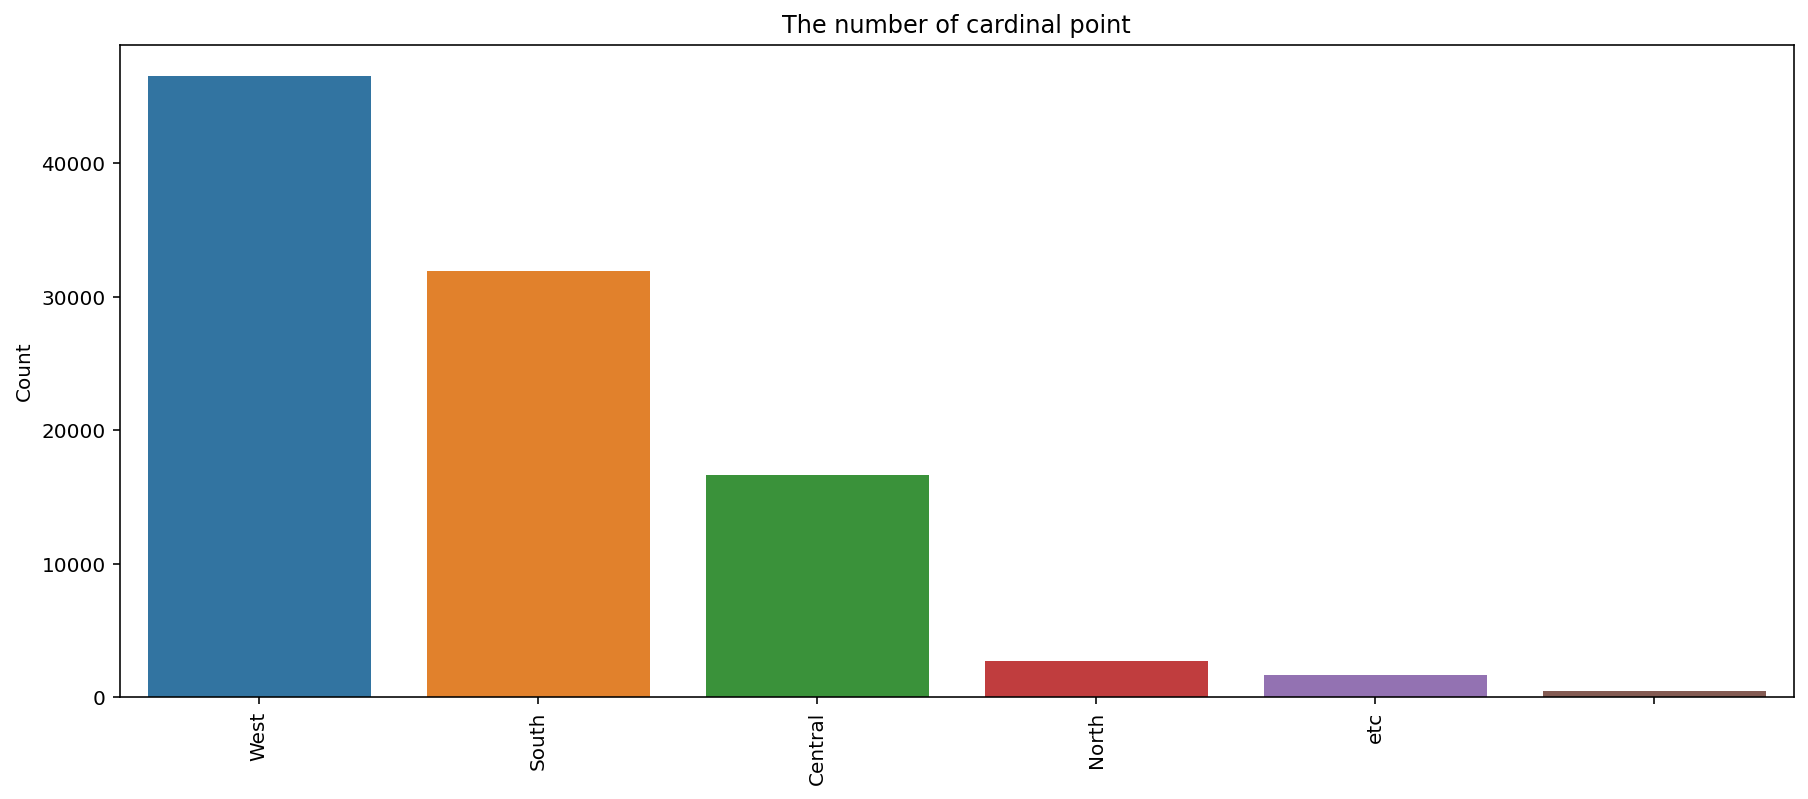

In [229]:
for cate in df_cate:
  cate_num = df[str(cate)].value_counts()
  plt.figure(figsize=(15,6))
  chart = sns.barplot(x = cate_num.index, y=cate_num)
  chart.set_title(f"The number of {cate}")
  plt.ylabel("Count")
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
  plt.show(15)

## 이름이 같은 제품의 평균 판매 가격 + (평균 소매 가격 + 팔릴 때까지의 평균 time gap + 최빈 지역?)

In [230]:
df.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region', 'Cheaper Buy', 'Same Buy',
       'Expensive Buy', 'time gap', 'cardinal point'],
      dtype='object')

In [231]:
# bruh = df[['Sneaker Name', 'Sale Price','Retail Price','time gap','cardinal point']]
bruh = df[['Sneaker Name', 'Sale Price','cardinal point']]
bruh.head()

,Sneaker Name,Sale Price,cardinal point
0,Adidas Yeezy Boost 350 Low V2 Beluga,1097,West
1,Adidas Yeezy Boost 350 V2 Core Black Copper,685,West
2,Adidas Yeezy Boost 350 V2 Core Black Green,690,West
3,Adidas Yeezy Boost 350 V2 Core Black Red,1075,East
4,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,East


## 상품 평균가격
* Test 데이터에 나와있는 상품명에 맞게 변경?

In [232]:
sneakernames = ['adidas Yeezy Boost 350 V2 Butter',
       'Adidas Yeezy Boost 350 V2 Beluga 2pt0',
       'Adidas Yeezy Boost 350 V2 Zebra',
       'Adidas Yeezy Boost 350 V2 Blue Tint',
       'Adidas Yeezy Boost 350 V2 Cream White',
       'Adidas Yeezy Boost 350 V2 Sesame', 'adidas Yeezy Boost 350 V2 Static',
       'Adidas Yeezy Boost 350 V2 Semi Frozen Yellow',
       'Air Jordan 1 Retro High Off White University Blue',
       'adidas Yeezy Boost 350 V2 Static Reflective',
       'Nike Air Presto Off White Black 2018',
       'Nike Air Presto Off White White 2018',
       'Nike Air VaporMax Off White 2018',
       'Nike Blazer Mid Off White All Hallows Eve',
       'Nike Blazer Mid Off White Grim Reaper', 'Nike Zoom Fly Off White Pink',
       'Nike Air VaporMax Off White Black',
       'Nike Zoom Fly Off White Black Silver',
       'Nike Air Force 1 Low Off White Volt',
       'Adidas Yeezy Boost 350 V2 Core Black Red 2017',
       'Nike Air Force 1 Low Off White Black White',
       'Air Jordan 1 Retro High Off White Chicago',
       'Nike Air Max 90 Off White Black',
       'Nike Zoom Fly Mercurial Off White Total Orange',
       'Nike Air Max 90 Off White Desert Ore',
       'Nike Zoom Fly Mercurial Off White Black', 'Nike Air Max 90 Off White',
       'Adidas Yeezy Boost 350 V2 Core Black White',
       'Nike Air Presto Off White', 'Nike Air Max 97 Off White',
       'Nike Air VaporMax Off White', 'Nike Blazer Mid Off White',
       'Adidas Yeezy Boost 350 Low V2 Beluga',
       'Nike React Hyperdunk 2017 Flyknit Off White',
       'Nike Air Force 1 Low Off White', 'Nike Zoom Fly Off White',
       'Nike Air Max 97 Off White Menta',
       'Air Jordan 1 Retro High Off White White',
       'Adidas Yeezy Boost 350 V2 Core Black Red',
       'Nike Air Max 97 Off White Black',
       'Nike Blazer Mid Off White Wolf Grey',
       'Adidas Yeezy Boost 350 V2 Core Black Copper',
       'Nike Air Max 97 Off White Elemental Rose Queen',
       'Adidas Yeezy Boost 350 V2 Core Black Green',
       'Adidas Yeezy Boost 350 Low Pirate Black 2016',
       'Adidas Yeezy Boost 350 Low Moonrock',
       'Adidas Yeezy Boost 350 Low Pirate Black 2015',
       'Adidas Yeezy Boost 350 Low Oxford Tan',
       'Adidas Yeezy Boost 350 Low Turtledove',
       'Nike Air Force 1 Low Virgil Abloh Off White AF100'
       ]

In [233]:
avgs_price=[]
avgs_point=[]

for name in sneakernames:
  shoerow = bruh.loc[bruh['Sneaker Name']==name]
  avgs_price.append(shoerow.mean()[0])
  avgs_point.append(shoerow['cardinal point'].mode()[0])

  # print(shoerow.mean()[1:3])
  # print(shoerow['cardinal point'].mode()[0])

AvgPrice = pd.Series(avgs_price)
ModePoint = pd.Series(avgs_point)

SneakerName = pd.Series(sneakernames)
avgprice_df = pd.DataFrame(columns=['Sneaker_Name','Average_Price'])
avgprice_df['Sneaker_Name'] = SneakerName
avgprice_df['Average_Price'] = AvgPrice

avgprice_df.head()


,Sneaker_Name,Average_Price
0,adidas Yeezy Boost 350 V2 Butter,269.760571
1,Adidas Yeezy Boost 350 V2 Beluga 2pt0,400.439634
2,Adidas Yeezy Boost 350 V2 Zebra,361.272206
3,Adidas Yeezy Boost 350 V2 Blue Tint,378.986125
4,Adidas Yeezy Boost 350 V2 Cream White,288.708805


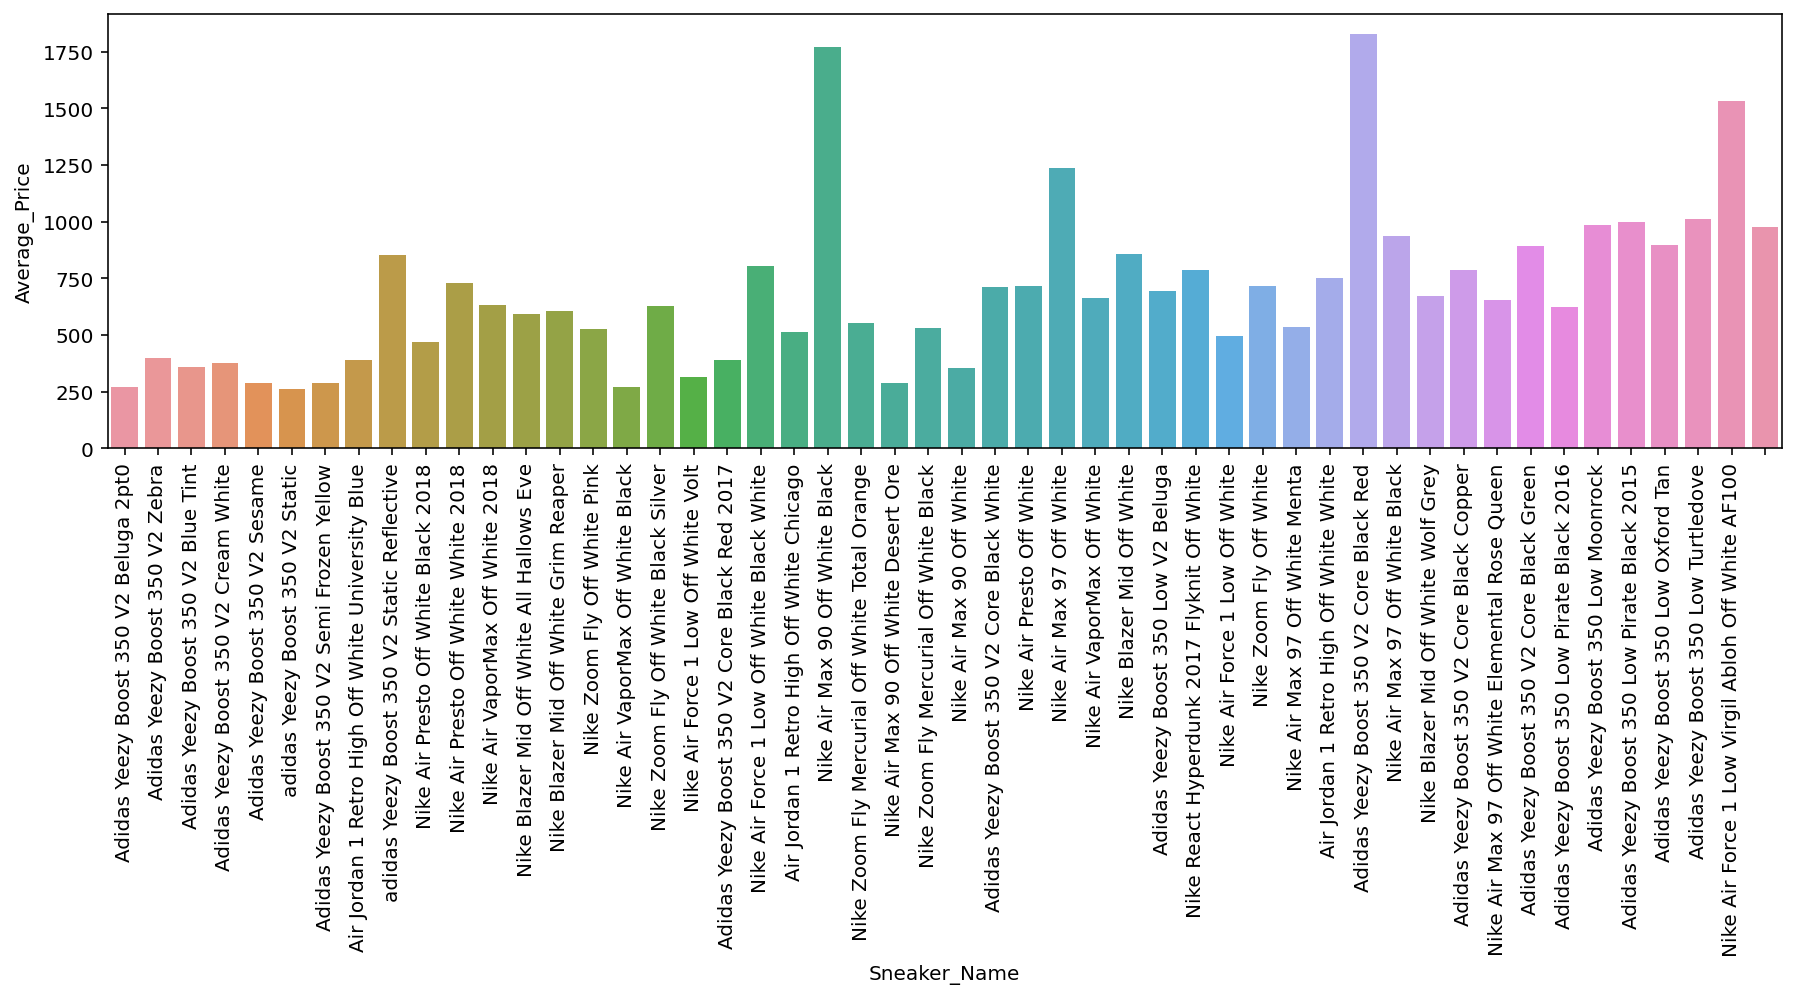

In [234]:
fig_dims = (15,4)
fig,ax = plt.subplots(figsize = fig_dims)
chart = sns.barplot(x = avgprice_df['Sneaker_Name'], y=avgprice_df['Average_Price'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

## 브랜드 평균 가격

In [235]:
avgs_price2 =[]
target_df = df[['Brand','Sale Price']]
brands = [' Yeezy','Off-White']

for brands_index in range(len(brands)):
  brandrow = target_df.loc[target_df['Brand'] == str(brands[brands_index])]
  avgs_price2.append(brandrow['Sale Price'].mean())
for i in range(len(avgs_price2)):
  print(f'{brands[i]} average price : $' + str(avgs_price2[i]))

 Yeezy average price : $360.03255175854326
Off-White average price : $671.4812909260992


In [236]:
target_df.head()

,Brand,Sale Price
0,Yeezy,1097
1,Yeezy,685
2,Yeezy,690
3,Yeezy,1075
4,Yeezy,828


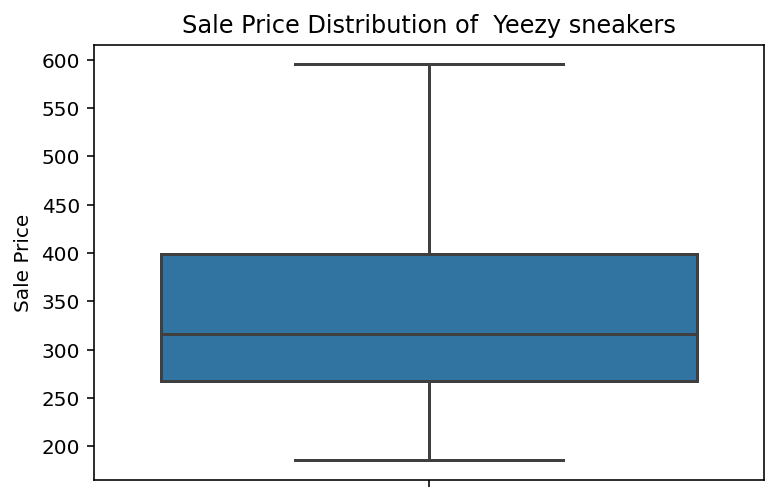

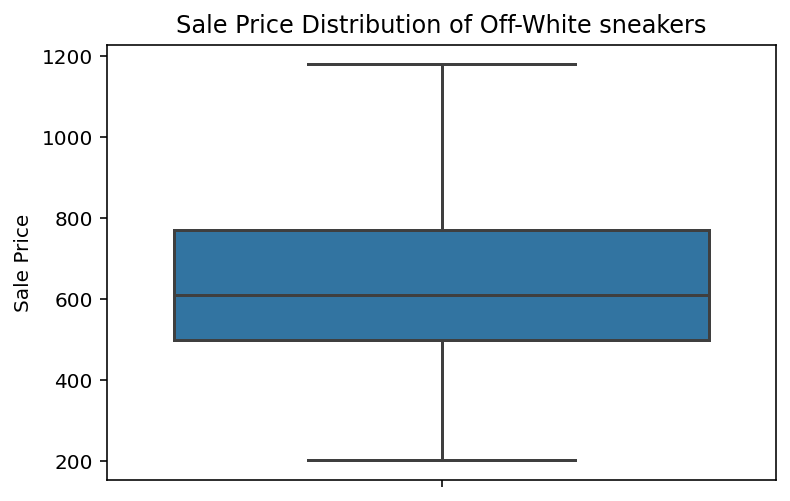

In [237]:
for brand in brands:
  brandrow = target_df.loc[target_df['Brand']==brand]
  chart = sns.boxplot(y=brandrow['Sale Price'],showfliers = False) # 이상치 안보여줌
  chart.set_title("Sale Price Distribution of %s sneakers" % (brand))
  plt.show()
  

## 트랜드 분석 : 판매가와 주문일

In [238]:
target_df = df[['Order Date', 'Sale Price']]
# ndarray 형태의 unique 를 list형태로
uniq_ord_dates = df['Order Date'].value_counts().index.tolist()
avgs_price3 = []

for date in uniq_ord_dates:
  daterow = target_df[target_df['Order Date']==str(date)]
  avgs_price3.append(daterow['Sale Price'].mean())
  
uniq_dates = pd.Series(uniq_ord_dates)
date_avgs = pd.Series(avgs_price3)
dateprice_df = pd.DataFrame(columns=['Order_date', 'Average_Price'])
dateprice_df['Order_date'] = uniq_dates.sort_values(ascending=True)
dateprice_df['Average_Price']=date_avgs
dateprice_df.head()


,Order_date,Average_Price
485,2017-09-01,653.000000
516,2017-09-02,649.600000
505,2017-09-03,672.437500
503,2017-09-04,623.764706
486,2017-09-05,648.772727


Text(0.5, 1.0, 'Average Daily Sale Price Over time')

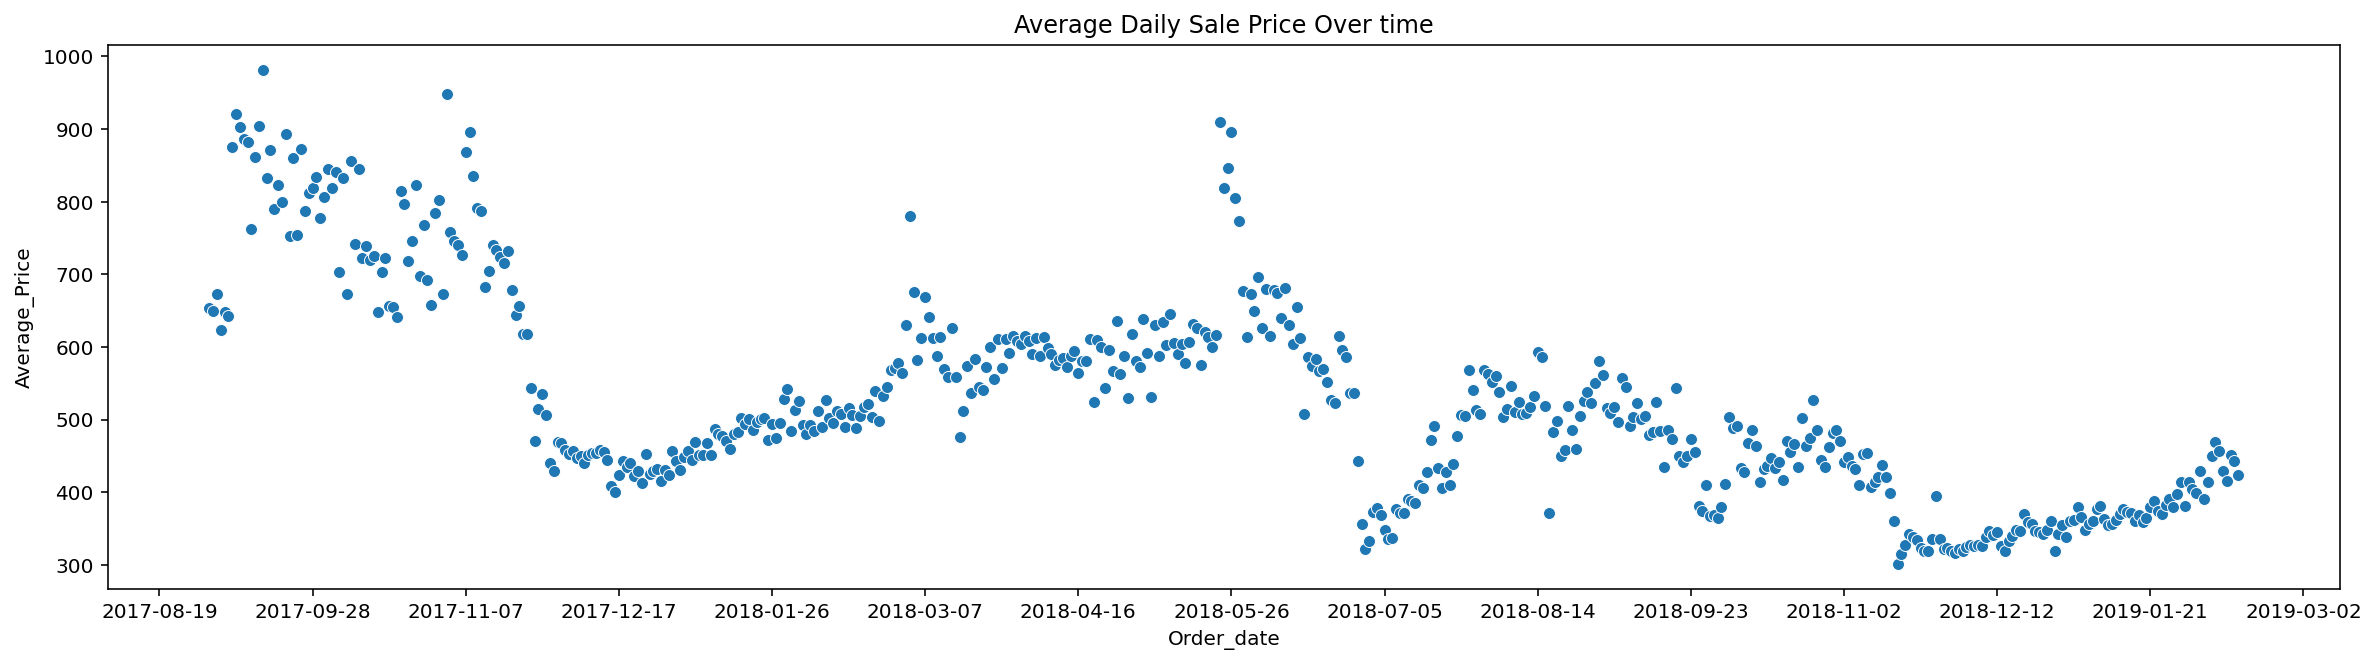

In [239]:
# 주문일 기준 시간에 따른 평균가격 변화 

fig_dims = (20,5)
fig,ax = plt.subplots(figsize=fig_dims)
chart = sns.scatterplot(x="Order_date",y="Average_Price",data=dateprice_df)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(40))
chart.set_title("Average Daily Sale Price Over time")

35


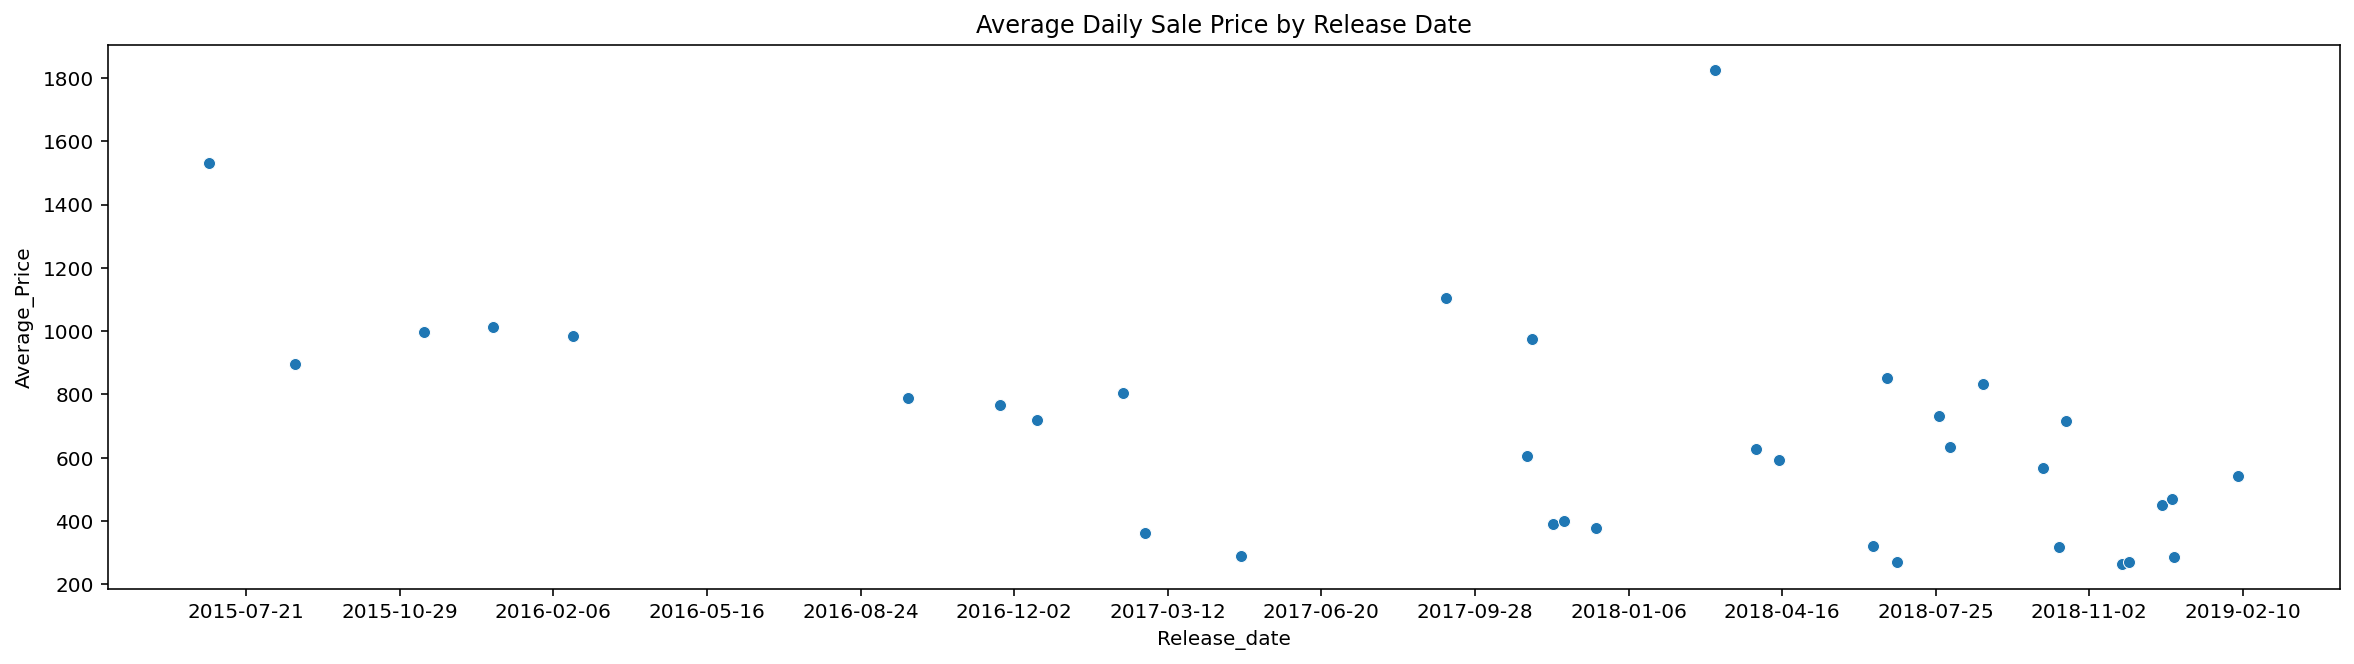

In [240]:
# 출시일 기준 시간에 따른 평균가격 변화 (확인 결과 출시일 고유값이 35개 뿐임)

target_df = df[['Release Date','Sale Price']]
uniq_rel = target_df['Release Date'].unique()
avgprice=[]

for uni in uniq_rel:
  daterow = target_df.loc[target_df['Release Date']== uni]
  avgprice.append(daterow['Sale Price'].mean())

Date = pd.Series(uniq_rel)
avgPrice = pd.Series(avgprice)
print(len(avgPrice))
rel_dateprice_df = pd.DataFrame(columns=['Release_date','Average_Price'])
rel_dateprice_df['Release_date'] = Date.sort_values(ascending=True)
rel_dateprice_df['Average_Price'] = avgPrice

fig_dims = (20,5)
fig,ax = plt.subplots(figsize=fig_dims)
chart = sns.scatterplot(x="Release_date",y="Average_Price",data=rel_dateprice_df)
chart.set_title("Average Daily Sale Price by Release Date")
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(100))

## 트랜드 분석 : 구매자 지역과 판매 가격 비교

In [241]:
target_df = df[['Buyer Region','Sale Price']]
uniq_region = df['Buyer Region'].value_counts().index.tolist()
avg_price = []

for region in uniq_region:
  region_row = target_df.loc[target_df['Buyer Region']==region]
  avg_price.append(region_row['Sale Price'].mean())

region_col = pd.Series(uniq_region)
avgprice_col = pd.Series(avg_price)

regionprice_df = pd.DataFrame(columns=['Buyer Region','Average Price'])
regionprice_df['Buyer Region'] = region_col
regionprice_df['Average Price'] = avgprice_col
regionprice_df.head().sort_values('Average Price',ascending=True)

,Buyer Region,Average Price
4,Texas,417.249149
1,New York,442.767141
3,Florida,445.425659
2,Oregon,469.550970
0,California,478.248178


Text(0.5, 1.0, 'Average Sale Price by Buyer Region')

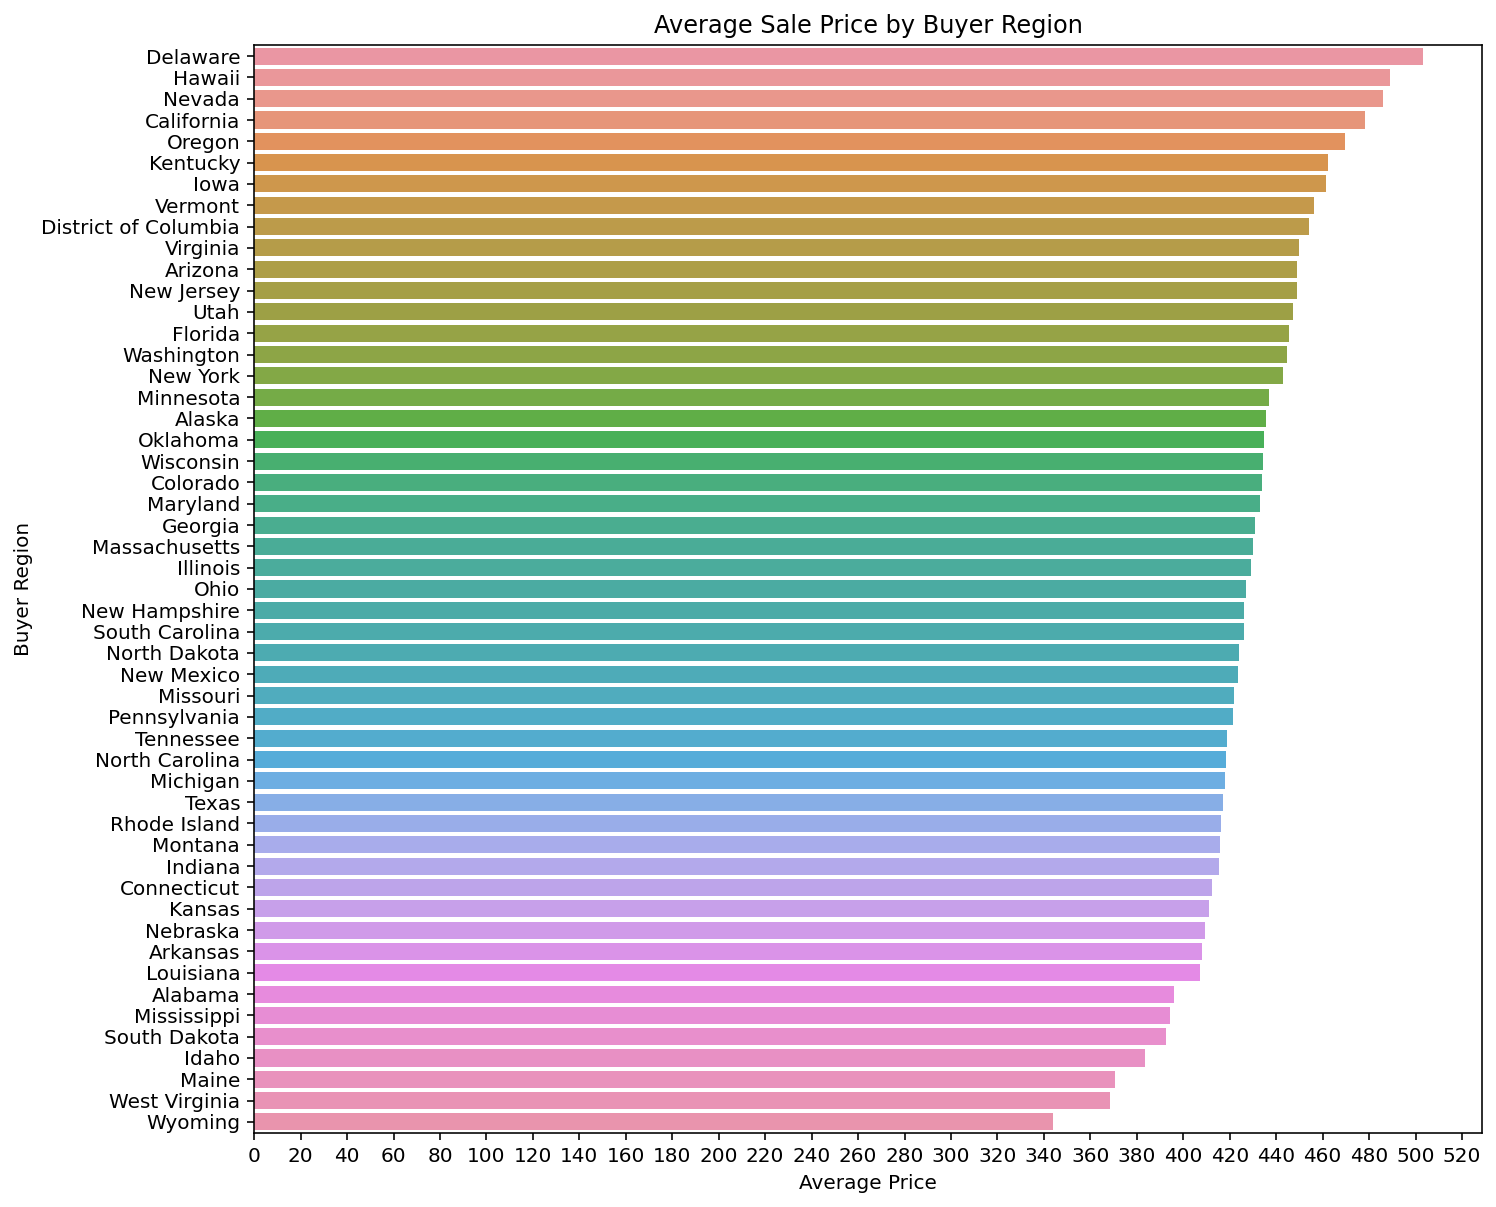

In [242]:
fig,ax = plt.subplots(figsize=(11,10))
chart = sns.barplot(x='Average Price',y='Buyer Region',data=regionprice_df.sort_values('Average Price',ascending=False))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(20))
chart.set_title("Average Sale Price by Buyer Region")

In [243]:
df['time gap'] = pd.to_numeric(df['time gap'])
df.dtypes

Order Date        datetime64[ns]
Brand                     object
Sneaker Name              object
Sale Price                 int64
Retail Price               int64
Release Date      datetime64[ns]
Shoe Size                float64
Buyer Region              object
Cheaper Buy                 bool
Same Buy                    bool
Expensive Buy               bool
time gap                   int64
cardinal point            object
dtype: object

In [244]:
# 몇배의 이익이 생겼는지에 대한 칼럼. 1보다 작으면 손해

df['multiple return'] = (df['Sale Price']/df['Retail Price'])
df['multiple return'] = df['multiple return'].round()
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap,cardinal point,multiple return
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California,False,False,True,342,West,5.0
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True,282,West,3.0
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False,True,282,West,3.0
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky,False,False,True,282,East,5.0
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False,True,202,East,4.0


In [245]:
#df[(df['time gap']<0)].drop(inplace = True)
df.drop(df.loc[df['time gap']<0].index, inplace=True)
df = df.reset_index(drop = True)
df.drop(df.loc[df['time gap']>800].index, inplace=True)
df = df.reset_index(drop = True)
df.drop(df.loc[df['Sale Price']>1000].index, inplace=True)
df = df.reset_index(drop = True)
df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap,cardinal point,multiple return
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True,282,West,3.0
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False,True,282,West,3.0
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False,True,202,East,4.0
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,798,220,2017-02-11,8.5,Michigan,False,False,True,202,East,4.0
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black White,784,220,2016-12-17,11.0,California,False,False,True,258,West,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91584,2019-02-13,Yeezy,adidas Yeezy Boost 350 V2 Static Reflective,565,220,2018-12-26,8.0,Oregon,False,False,True,49,West,3.0
91585,2019-02-13,Yeezy,adidas Yeezy Boost 350 V2 Static Reflective,598,220,2018-12-26,8.5,California,False,False,True,49,West,3.0
91586,2019-02-13,Yeezy,adidas Yeezy Boost 350 V2 Static Reflective,605,220,2018-12-26,5.5,New York,False,False,True,49,East,3.0
91587,2019-02-13,Yeezy,adidas Yeezy Boost 350 V2 Static Reflective,650,220,2018-12-26,11.0,California,False,False,True,49,West,3.0


# Modeling

## 머신러닝 모델링을 위한 전처리

In [246]:
df.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region', 'Cheaper Buy', 'Same Buy',
       'Expensive Buy', 'time gap', 'cardinal point', 'multiple return'],
      dtype='object')

### 컬럼명 변경

In [247]:
# 컬럼명 공백 제거

df = df.rename(columns={
    "Order Date":"Order_date",
    "Sneaker Name": "Sneaker_Name",
    "Sale Price": "Sale_Price",
    "Retail Price": "Retail_Price",
    "Release Date": "Release_Date",
    "Shoe Size": "Shoe_Size",
    "Buyer Region": "Buyer_Region", 
    'Cheaper Buy': 'Cheaper_Buy',
    'Same Buy':'Same_Buy',
    'Expensive Buy':'Expensive_Buy',
    'time gap':'time_gap',
    'cardinal point':'cardinal_point'
    })

### Target Feature 등 컬럼 제거 후 train/test set 분리

In [248]:
# True/False 데이터나 카테고리컬 데이터를 수치형으로 바꿔서 사용할 순 없을까?

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics

X = df.drop(['Sale_Price'],axis=1)
y = df['Sale_Price']

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)


### Encoding

In [249]:
# 범주형 데이터 -> 수치형 데이터

from sklearn.preprocessing import OneHotEncoder

object_cols = ['Sneaker_Name','Buyer_Region','Brand'] 

# cheaper,same,expensive Buy / cardinal point 추가 가능할까? => (내일아침) 추가하지 말고 test셋과 비슷한 컬럼을 제외하고 싹다 삭제 후 인코딩 !!!
# 트랜드 분석을 위해 만들어주었던 Feature들을 머신러닝 모델에 넣으면 과적합이 발생해서 제거해준 것인가?


# 범주형 데이터를 가진 컬럼에 원핫인코딩 적용
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_val[object_cols]))

# 원핫인코딩 인덱스 제거 -> 인덱스 치환
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_val.index

# 원핫 인코딩 후 컬럼명 추가
OH_cols_train.columns = OH_encoder.get_feature_names(object_cols)
OH_cols_valid.columns = OH_encoder.get_feature_names(object_cols)

# train, validation 데이터셋에서 원핫인코딩한 컬럼들 삭제(수치형 Feature들만 존재)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_val.drop(object_cols, axis=1)

# 원핫인코딩한 결과 병합
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [250]:
OH_X_train

,Order_date,Retail_Price,Release_Date,Shoe_Size,Cheaper_Buy,Same_Buy,Expensive_Buy,time_gap,cardinal_point,multiple return,Sneaker_Name_Adidas Yeezy Boost 350 Low Moonrock,Sneaker_Name_Adidas Yeezy Boost 350 Low Oxford Tan,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2015,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2016,Sneaker_Name_Adidas Yeezy Boost 350 Low V2 Beluga,Sneaker_Name_Adidas Yeezy Boost 350 V2 Beluga 2pt0,Sneaker_Name_Adidas Yeezy Boost 350 V2 Blue Tint,Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Copper,Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Green,Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Red,Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Red 2017,Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black White,Sneaker_Name_Adidas Yeezy Boost 350 V2 Cream White,Sneaker_Name_Adidas Yeezy Boost 350 V2 Semi Frozen Yellow,Sneaker_Name_Adidas Yeezy Boost 350 V2 Sesame,Sneaker_Name_Adidas Yeezy Boost 350 V2 Zebra,Sneaker_Name_Air Jordan 1 Retro High Off White Chicago,Sneaker_Name_Air Jordan 1 Retro High Off White University Blue,Sneaker_Name_Nike Air Force 1 Low Off White,Sneaker_Name_Nike Air Force 1 Low Off White Black White,Sneaker_Name_Nike Air Force 1 Low Off White Volt,Sneaker_Name_Nike Air Force 1 Low Virgil Abloh Off White AF100,Sneaker_Name_Nike Air Max 90 Off White,Sneaker_Name_Nike Air Max 90 Off White Black,Sneaker_Name_Nike Air Max 90 Off White Desert Ore,Sneaker_Name_Nike Air Max 97 Off White,Sneaker_Name_Nike Air Max 97 Off White Black,Sneaker_Name_Nike Air Max 97 Off White Elemental Rose Queen,Sneaker_Name_Nike Air Max 97 Off White Menta,Sneaker_Name_Nike Air Presto Off White,Sneaker_Name_Nike Air Presto Off White Black 2018,Sneaker_Name_Nike Air Presto Off White White 2018,Sneaker_Name_Nike Air VaporMax Off White,Sneaker_Name_Nike Air VaporMax Off White 2018,Sneaker_Name_Nike Air VaporMax Off White Black,Sneaker_Name_Nike Blazer Mid Off White,Sneaker_Name_Nike Blazer Mid Off White All Hallows Eve,Sneaker_Name_Nike Blazer Mid Off White Grim Reaper,Sneaker_Name_Nike Blazer Mid Off White Wolf Grey,Sneaker_Name_Nike React Hyperdunk 2017 Flyknit Off White,Sneaker_Name_Nike Zoom Fly Mercurial Off White Black,Sneaker_Name_Nike Zoom Fly Mercurial Off White Total Orange,Sneaker_Name_Nike Zoom Fly Off White,Sneaker_Name_Nike Zoom Fly Off White Black Silver,Sneaker_Name_Nike Zoom Fly Off White Pink,Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,Sneaker_Name_adidas Yeezy Boost 350 V2 Static,Sneaker_Name_adidas Yeezy Boost 350 V2 Static Reflective,Buyer_Region_Alabama,Buyer_Region_Alaska,Buyer_Region_Arizona,Buyer_Region_Arkansas,Buyer_Region_California,Buyer_Region_Colorado,Buyer_Region_Connecticut,Buyer_Region_Delaware,Buyer_Region_District of Columbia,Buyer_Region_Florida,Buyer_Region_Georgia,Buyer_Region_Hawaii,Buyer_Region_Idaho,Buyer_Region_Illinois,Buyer_Region_Indiana,Buyer_Region_Iowa,Buyer_Region_Kansas,Buyer_Region_Kentucky,Buyer_Region_Louisiana,Buyer_Region_Maine,Buyer_Region_Maryland,Buyer_Region_Massachusetts,Buyer_Region_Michigan,Buyer_Region_Minnesota,Buyer_Region_Mississippi,Buyer_Region_Missouri,Buyer_Region_Montana,Buyer_Region_Nebraska,Buyer_Region_Nevada,Buyer_Region_New Hampshire,Buyer_Region_New Jersey,Buyer_Region_New Mexico,Buyer_Region_New York,Buyer_Region_North Carolina,Buyer_Region_North Dakota,Buyer_Region_Ohio,Buyer_Region_Oklahoma,Buyer_Region_Oregon,Buyer_Region_Pennsylvania,Buyer_Region_Rhode Island,Buyer_Region_South Carolina,Buyer_Region_South Dakota,Buyer_Region_Tennessee,Buyer_Region_Texas,Buyer_Region_Utah,Buyer_Region_Vermont,Buyer_Region_Virginia,Buyer_Region_Washington,Buyer_Region_West Virginia,Buyer_Region_Wisconsin,Buyer_Region_Wyoming,Brand_ Yeezy,Brand_Off-White
87150,2019-02-03,170,2018-10-13,12.0,False,False,True,113,South,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [251]:
OH_X_train.dtypes

Order_date                    datetime64[ns]
Retail_Price                           int64
Release_Date                  datetime64[ns]
Shoe_Size                            float64
Cheaper_Buy                             bool
                                   ...      
Buyer_Region_West Virginia           float64
Buyer_Region_Wisconsin               float64
Buyer_Region_Wyoming                 float64
Brand_ Yeezy                         float64
Brand_Off-White                      float64
Length: 111, dtype: object

## 모델 적용

In [252]:
OH_X_train = OH_X_train.drop(['Order_date','Release_Date', 'cardinal_point'], axis = 1)
OH_X_valid = OH_X_valid.drop(['Order_date','Release_Date', 'cardinal_point'], axis = 1)

In [203]:
#pd.set_option('display.max_columns', None)
#OH_X_train.head(2)

,Retail_Price,Shoe_Size,Cheaper_Buy,Same_Buy,Expensive_Buy,time_gap,multiple return,Sneaker_Name_Adidas Yeezy Boost 350 Low Moonrock,Sneaker_Name_Adidas Yeezy Boost 350 Low Oxford Tan,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2015,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2016,Sneaker_Name_Adidas Yeezy Boost 350 Low V2 Beluga,Sneaker_Name_Adidas Yeezy Boost 350 V2 Beluga 2pt0,Sneaker_Name_Adidas Yeezy Boost 350 V2 Blue Tint,Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Copper,Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Green,Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Red,Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Red 2017,Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black White,Sneaker_Name_Adidas Yeezy Boost 350 V2 Cream White,Sneaker_Name_Adidas Yeezy Boost 350 V2 Semi Frozen Yellow,Sneaker_Name_Adidas Yeezy Boost 350 V2 Sesame,Sneaker_Name_Adidas Yeezy Boost 350 V2 Zebra,Sneaker_Name_Air Jordan 1 Retro High Off White Chicago,Sneaker_Name_Air Jordan 1 Retro High Off White University Blue,Sneaker_Name_Nike Air Force 1 Low Off White,Sneaker_Name_Nike Air Force 1 Low Off White Black White,Sneaker_Name_Nike Air Force 1 Low Off White Volt,Sneaker_Name_Nike Air Force 1 Low Virgil Abloh Off White AF100,Sneaker_Name_Nike Air Max 90 Off White,Sneaker_Name_Nike Air Max 90 Off White Black,Sneaker_Name_Nike Air Max 90 Off White Desert Ore,Sneaker_Name_Nike Air Max 97 Off White,Sneaker_Name_Nike Air Max 97 Off White Black,Sneaker_Name_Nike Air Max 97 Off White Elemental Rose Queen,Sneaker_Name_Nike Air Max 97 Off White Menta,Sneaker_Name_Nike Air Presto Off White,Sneaker_Name_Nike Air Presto Off White Black 2018,Sneaker_Name_Nike Air Presto Off White White 2018,Sneaker_Name_Nike Air VaporMax Off White,Sneaker_Name_Nike Air VaporMax Off White 2018,Sneaker_Name_Nike Air VaporMax Off White Black,Sneaker_Name_Nike Blazer Mid Off White,Sneaker_Name_Nike Blazer Mid Off White All Hallows Eve,Sneaker_Name_Nike Blazer Mid Off White Grim Reaper,Sneaker_Name_Nike Blazer Mid Off White Wolf Grey,Sneaker_Name_Nike React Hyperdunk 2017 Flyknit Off White,Sneaker_Name_Nike Zoom Fly Mercurial Off White Black,Sneaker_Name_Nike Zoom Fly Mercurial Off White Total Orange,Sneaker_Name_Nike Zoom Fly Off White,Sneaker_Name_Nike Zoom Fly Off White Black Silver,Sneaker_Name_Nike Zoom Fly Off White Pink,Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,Sneaker_Name_adidas Yeezy Boost 350 V2 Static,Sneaker_Name_adidas Yeezy Boost 350 V2 Static Reflective,Buyer_Region_Alabama,Buyer_Region_Alaska,Buyer_Region_Arizona,Buyer_Region_Arkansas,Buyer_Region_California,Buyer_Region_Colorado,Buyer_Region_Connecticut,Buyer_Region_Delaware,Buyer_Region_District of Columbia,Buyer_Region_Florida,Buyer_Region_Georgia,Buyer_Region_Hawaii,Buyer_Region_Idaho,Buyer_Region_Illinois,Buyer_Region_Indiana,Buyer_Region_Iowa,Buyer_Region_Kansas,Buyer_Region_Kentucky,Buyer_Region_Louisiana,Buyer_Region_Maine,Buyer_Region_Maryland,Buyer_Region_Massachusetts,Buyer_Region_Michigan,Buyer_Region_Minnesota,Buyer_Region_Mississippi,Buyer_Region_Missouri,Buyer_Region_Montana,Buyer_Region_Nebraska,Buyer_Region_Nevada,Buyer_Region_New Hampshire,Buyer_Region_New Jersey,Buyer_Region_New Mexico,Buyer_Region_New York,Buyer_Region_North Carolina,Buyer_Region_North Dakota,Buyer_Region_Ohio,Buyer_Region_Oklahoma,Buyer_Region_Oregon,Buyer_Region_Pennsylvania,Buyer_Region_Rhode Island,Buyer_Region_South Carolina,Buyer_Region_South Dakota,Buyer_Region_Tennessee,Buyer_Region_Texas,Buyer_Region_Utah,Buyer_Region_Vermont,Buyer_Region_Virginia,Buyer_Region_Washington,Buyer_Region_West Virginia,Buyer_Region_Wisconsin,Buyer_Region_Wyoming,Brand_ Yeezy,Brand_Off-White
12776,220,12.0,False,False,True,21,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [204]:
"""OH_X_train = OH_X_train.drop(['Buyer_Region_Alabama','Buyer_Region_Alaska', 'Buyer_Region_Arizona','Buyer_Region_Arkansas', 'Buyer_Region_California','Buyer_Region_Colorado'
, 'Buyer_Region_Connecticut', 'Buyer_Region_Delaware','Buyer_Region_District of Columbia','Buyer_Region_Florida','Buyer_Region_Georgia',
'Buyer_Region_Hawaii','Buyer_Region_Idaho','Buyer_Region_Illinois','Buyer_Region_Indiana','Buyer_Region_Iowa','Buyer_Region_Kansas',
'Buyer_Region_Kentucky','Buyer_Region_Louisiana','Buyer_Region_Maine','Buyer_Region_Maryland','Buyer_Region_Massachusetts','Buyer_Region_Michigan',
'Buyer_Region_Minnesota','Buyer_Region_Mississippi', 'Buyer_Region_Missouri','Buyer_Region_Montana','Buyer_Region_Nebraska','Buyer_Region_Nevada',
'Buyer_Region_New Hampshire','Buyer_Region_New Jersey','Buyer_Region_New Mexico','Buyer_Region_New York','Buyer_Region_North Carolina',
'Buyer_Region_North Dakota','Buyer_Region_Ohio','Buyer_Region_Oklahoma','Buyer_Region_Oregon','Buyer_Region_Pennsylvania',
'Buyer_Region_Rhode Island','Buyer_Region_South Carolina','Buyer_Region_South Dakota','Buyer_Region_Tennessee','Buyer_Region_Texas',
'Buyer_Region_Utah','Buyer_Region_Vermont','Buyer_Region_Virginia','Buyer_Region_Washington','Buyer_Region_West Virginia','Buyer_Region_Wisconsin',
'Buyer_Region_Wyoming'], axis = 1)
OH_X_valid = OH_X_valid.drop(['Buyer_Region_Alabama','Buyer_Region_Alaska', 'Buyer_Region_Arizona','Buyer_Region_Arkansas', 'Buyer_Region_California','Buyer_Region_Colorado'
, 'Buyer_Region_Connecticut', 'Buyer_Region_Delaware','Buyer_Region_District of Columbia','Buyer_Region_Florida','Buyer_Region_Georgia',
'Buyer_Region_Hawaii','Buyer_Region_Idaho','Buyer_Region_Illinois','Buyer_Region_Indiana','Buyer_Region_Iowa','Buyer_Region_Kansas',
'Buyer_Region_Kentucky','Buyer_Region_Louisiana','Buyer_Region_Maine','Buyer_Region_Maryland','Buyer_Region_Massachusetts','Buyer_Region_Michigan',
'Buyer_Region_Minnesota','Buyer_Region_Mississippi', 'Buyer_Region_Missouri','Buyer_Region_Montana','Buyer_Region_Nebraska','Buyer_Region_Nevada',
'Buyer_Region_New Hampshire','Buyer_Region_New Jersey','Buyer_Region_New Mexico','Buyer_Region_New York','Buyer_Region_North Carolina',
'Buyer_Region_North Dakota','Buyer_Region_Ohio','Buyer_Region_Oklahoma','Buyer_Region_Oregon','Buyer_Region_Pennsylvania',
'Buyer_Region_Rhode Island','Buyer_Region_South Carolina','Buyer_Region_South Dakota','Buyer_Region_Tennessee','Buyer_Region_Texas',
'Buyer_Region_Utah','Buyer_Region_Vermont','Buyer_Region_Virginia','Buyer_Region_Washington','Buyer_Region_West Virginia','Buyer_Region_Wisconsin',
'Buyer_Region_Wyoming'], axis = 1)"""

### Baseline - Linear Regression

In [253]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(OH_X_train,y_train)

LinearRegression()

In [254]:
# y절편 확인

print(lm.intercept_)

-353.76526336485483


In [255]:
# 상관계수 확인

coeff_df = pd.DataFrame(lm.coef_,OH_X_train.columns,columns=['Coefficient'])
ranked_coeff = coeff_df.sort_values("Coefficient",ascending=True)
ranked_coeff

,Coefficient
Sneaker_Name_Adidas Yeezy Boost 350 V2 Blue Tint,-136.593838
Sneaker_Name_Adidas Yeezy Boost 350 V2 Sesame,-121.676344
Sneaker_Name_Adidas Yeezy Boost 350 V2 Beluga 2pt0,-120.901355
Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,-114.145802
Sneaker_Name_adidas Yeezy Boost 350 V2 Static,-109.776634
...,...
Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2016,123.468604
Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Red,130.941742
multiple return,141.149453
Sneaker_Name_Air Jordan 1 Retro High Off White Chicago,142.460540


In [256]:
# 예측값 저장, 평가 지표 적용

pred = lm.predict(OH_X_valid)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_val,pred))
print("MSE :",metrics.mean_squared_error(y_val,pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_val,pred)))
print("R2 :", metrics.r2_score(y_val,pred))

MAE : 28.01818329187748
MSE : 1406.9797104799777
RMSE : 37.509728211225124
R2 : 0.9512117637358974


### Model1

### Model2

### Model3

### Model4

# 모델 예측 방향 설정 / train,test 셋 통일

In [257]:
test.drop(columns=['Unnamed: 0'],inplace=True)

In [258]:
test.columns

Index(['item', 'brand', 'retail', 'release', 'lowestAsk', 'numberOfAsks',
       'salesThisPeriod', 'highestBid', 'numberOfBids', 'annualHigh',
       'annualLow', 'volatility', 'deadstockSold', 'averageDeadstockPrice',
       'lastSale', 'changePercentage'],
      dtype='object')

In [259]:
test.head(2)

,item,brand,retail,release,lowestAsk,numberOfAsks,salesThisPeriod,highestBid,numberOfBids,annualHigh,annualLow,volatility,deadstockSold,averageDeadstockPrice,lastSale,changePercentage
0,adidas Yeezy Foam RNR Onyx,adidas,80,2022-06-08,159,3560,2615,226,1193,833,138,0.092028,8904,188,184,0.051429
1,Jordan 1 Retro High OG Visionaire,Jordan,170,2022-06-11,186,1149,478,220,567,343,137,0.054394,1146,209,190,-0.024050


In [260]:
test['volatility'].describe()

count    1000.000000
mean        0.132319
std         0.075146
min         0.010642
25%         0.085594
50%         0.117962
75%         0.157734
max         0.754551
Name: volatility, dtype: float64

In [261]:
test2 = test.copy()
test2.columns=['Sneaker_Name','Brand','retail Price','Release Date','가장낮은판매입찰가격','판매입찰수','최근12개월간판매건수','가장높은구매입찰가격','구매입찰수','연간가장높은가격','연간가장낮은가격','최근12개월간가격변동률','팔린신발수','평균신발가격','최근 판매가','최근가격변동률']
test2.head()

,Sneaker_Name,Brand,retail Price,Release Date,가장낮은판매입찰가격,판매입찰수,최근12개월간판매건수,가장높은구매입찰가격,구매입찰수,연간가장높은가격,연간가장낮은가격,최근12개월간가격변동률,팔린신발수,평균신발가격,최근 판매가,최근가격변동률
0,adidas Yeezy Foam RNR Onyx,adidas,80,2022-06-08,159,3560,2615,226,1193,833,138,0.092028,8904,188,184,0.051429
1,Jordan 1 Retro High OG Visionaire,Jordan,170,2022-06-11,186,1149,478,220,567,343,137,0.054394,1146,209,190,-0.024050
2,Jordan 4 Retro Infrared,Jordan,200,2022-06-15,255,1284,345,300,547,2043,216,0.032678,938,333,260,-0.018868
3,NikeCraft General Purpose Shoe Tom Sachs,Nike,110,2022-06-10,310,530,176,725,1141,2199,100,0.406753,827,566,320,-0.389280
4,adidas Yeezy Boost 700 Hi-Res Red,adidas,300,2022-06-17,340,312,111,341,155,449,295,0.024200,112,354,350,0.008646


In [262]:
# train과 test 데이터에서 일치하는 상품명 한개도 없음.=> 상품명으로 가격을 예측하기 보다 큰범주로 접근해야할듯 (ex. 신발이름에서 뒷부분 자른것, 브랜드, 출시일)

df_N = df['Sneaker_Name'].value_counts().index.tolist()
test_N = test2['Sneaker_Name'].value_counts().index.tolist()
count = 0
for name in test_N:
  if name in df_N:
    count+=1
print(count)

0


# 이부분이 중요합니다 꼭 봐주세요

In [263]:
#제가 생각했을 때 필요한 컬럼만 남기는 과정입니다.

test_df = test2.drop(columns=['가장낮은판매입찰가격','판매입찰수','최근12개월간판매건수','가장높은구매입찰가격','구매입찰수','연간가장높은가격','팔린신발수','연간가장낮은가격','최근12개월간가격변동률','최근가격변동률'])
test_df.head()
# 여기서 최근 판매가는 변동성이 너무 커서 우리의 머신러닝 모델로 예측하는 가격은 평균신발가격으로 설정하는게 좋을 것같아서 최근 판매가 컬럼도 삭제하겠습니다.
test_df2 = test_df.drop('최근 판매가',axis=1)

# 주 목적은 아래의 test 데이터에서 신발 이름과 train 데이터에서 신발이름을 비교하여 공통으로 들어가는 부분까지 신발이름을 잘라서 새로운 신발이름 컬럼을 만드는 것입니다.
# 예를 들어, 아래의 0번 row에서 adidas Yeezy Foam RNR Onyx 라는 이름의 상품이 train 데이터에서는 adidas Yeezy Foam TTT OOOO 라는 이름이 존재한다면,
# 공통되는 이름 부분을 제외한 나머지를 모두 없애주어 train과 test 데이터의 신발 이름(Sneaker_Name)컬럼을 최대한 비슷하게 만들어줍니다.
# 이렇게 했을떄 결과적으로 고객이 [신발 이름, 브랜드,(오늘날짜 - 출시일),소매가 ] -> 평균 신발 가격 예측(혹은 최근판매가=> 이건 둘다 해보고 더 잘맞추는걸 선택해도 될듯)
'''
중요한 부분이라 좀 더 구체적으로 설명하자면, Jordan 4 Retro의 평균 가격을 예측하기 위해 
train 데이터(df)의 브랜드, 신발 이름, (주문일-출시일), 소매가 => 판매가 예측 학습
test 데이터(test_df2) 의 브랜드, 신발 이름, (현재날짜 - 출시일), 소매가 [입력] => 평균신발가격과 비슷한지 성능 평가
'''
test_df2.head()

,Sneaker_Name,Brand,retail Price,Release Date,평균신발가격
0,adidas Yeezy Foam RNR Onyx,adidas,80,2022-06-08,188
1,Jordan 1 Retro High OG Visionaire,Jordan,170,2022-06-11,209
2,Jordan 4 Retro Infrared,Jordan,200,2022-06-15,333
3,NikeCraft General Purpose Shoe Tom Sachs,Nike,110,2022-06-10,566
4,adidas Yeezy Boost 700 Hi-Res Red,adidas,300,2022-06-17,354


In [266]:
test_df2['Release Date'] = pd.to_datetime(test_df2['Release Date'])
test_df2.dtypes

Sneaker_Name            object
Brand                   object
retail Price             int64
Release Date    datetime64[ns]
평균신발가격                   int64
dtype: object

In [272]:
from datetime import datetime
date='2022-06-15'
date=datetime.strptime(date,'%Y-%m-%d')
test_df2['time_gap'] = date - test_df2['Release Date']
test_df2.head(2)

,Sneaker_Name,Brand,retail Price,Release Date,평균신발가격,time_gap
0,adidas Yeezy Foam RNR Onyx,adidas,80,2022-06-08,188,7 days
1,Jordan 1 Retro High OG Visionaire,Jordan,170,2022-06-11,209,4 days


In [273]:
test_df2['time_gap'].describe()

count                            931
mean     359 days 12:40:59.291084856
std      491 days 19:50:52.414819728
min              -100 days +00:00:00
25%                 77 days 00:00:00
50%                214 days 00:00:00
75%                462 days 00:00:00
max               6740 days 00:00:00
Name: time_gap, dtype: object

In [275]:
test_df2['Cheaper Buy'] = test_df2['평균신발가격'] < test_df2['retail Price']
test_df2['Same Buy'] = test_df2['평균신발가격'] == test_df2['retail Price']
test_df2['Expensive Buy'] = test_df2['평균신발가격'] > test_df2['retail Price']
test_df2['time_gap'] = test_df2['time_gap'].apply(lambda x: str(x).split(' ')[0])
test_df2['time_gap'] = test_df2['time_gap'].dt.days
test_df2['multiple return'] = (test_df2['평균신발가격	']/test_df2['retail Price'])
test_df2['multiple return'] = test_df2['multiple return'].round()
test_df2.head(2)

AttributeError: ignored

In [ ]:
df.head()

,Order_date,Brand,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region,Cheaper_Buy,Same_Buy,Expensive_Buy,time_gap,cardinal_point
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California,False,False,True,342,West
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True,282,West
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False,True,282,West
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky,False,False,True,282,East
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False,True,202,East
